#**Life Cycle of Data Science Projects**


1.Data Analysis

2.Feature Engineering

3.Feature Selection

4.Model Building

5.Model Deployment

In [1]:
import pandas as pd # python library to manipulate data. pandas is acronym of panneled data
import numpy as np # numerical python . python library for arithmetical operations

#python library for data visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#to suppress warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_excel('/content/drive/MyDrive/HR.xlsx')

In [4]:
## To display all columns of the Data Frame

pd.pandas.set_option('display.max_columns',None)

In [5]:
data.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [6]:
# To display column names

data.columns

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Salary', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
       'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales',
       'Months', 'Education'],
      dtype='object')

Feature Description

Gender - talks of the gender - Male or female

Business - if the person has another business or no

Dependants - if there are people dependant on the person

Calls - if the person has authority to make calls or not

Type - salary settlement type or contract type

Billing - Subscribed to billing plans or no

Rating - If he has been given a rating by a superior or no

Age - age of the person

Salary - CTC of the employee

Base pay - Base pay of the employee

Bonus - amount received by a person as bonus for sales

Unit price - The Unit price of a sale

Volume - volume allotted to a person

Opening balance - The opening balance of an employee

Closing Balance- The closing balance of an employee

Low - lowest opening balance allotted to a person.

Unit sales - unit sale made by the person

Total sales - total sales made by the person

Months - duration of the person employed with the company

Education- Educational background of an employee

In [7]:
# Number of obs#ervations per feature ie 5000 rows per 20 colums

data.shape

(5000, 20)

In [8]:
#statistical summary of the data

data.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


#**1.Exploratory Data Analysis**

In Data Analysis We Try to analyse the following:

1.Missing Values

2.All the Numerical Variables

3.Distribution of Numerical Variables

4.Categorical Variables

5.Cardinality of Categorical Variables

7.Relationship between independent and dependent feature

In [9]:
data.dtypes

Gender             object
Business            int64
Dependancies       object
Calls              object
Type               object
Billing            object
Rating             object
Age                 int64
Salary            float64
Base_pay          float64
Bonus             float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
Unit_Sales        float64
Total_Sales        object
Months              int64
Education          object
dtype: object

*The datatype of the variable 'Total_Sales' is object. It is a numerical variable. It contains space as a value so considered as object. Need to be changed in to numerical type for proper treatment*

**1.Missing Values**

In [10]:
# Sum of missing values in each columns


data.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

In [11]:
#replace the object items in coloumn Total_Sales with "NaN"

data['Total_Sales'] = data['Total_Sales'].replace(' ', pd.NA)

In [12]:
#change the dtype of "Total_Sales" as float

data['Total_Sales'] = data['Total_Sales'].astype('Float64')
data['Total_Sales'] = data['Total_Sales'].astype('float64')
data['Total_Sales'].dtype

dtype('float64')

In [13]:
data.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

*Its evident that Null values increased after changing data type of Total_Sales*

In [14]:
#Checking the percentage of null values in each feature
#Step 1 - Creating a list of features with null values

features_with_na = [features for features in data.columns if data[features].isnull().sum()>=1]

#Step2 -Print the feature name and percentage of missing values

for feature in features_with_na:
    print(feature,np.round(data[feature].isnull().mean(),3), ' % missing values') # Round to 3 Desimal points

Base_pay 0.005  % missing values
openingbalance 0.295  % missing values
Total_Sales 0.003  % missing values


*There are missing values with 3 columns and only the opening balance shows 30% missing values*
*now lets find the relationship between missing values and Salary(Dependent Variable, target, column*

In [15]:
# Print features with null values stored to a variable

features_with_na

['Base_pay', 'openingbalance', 'Total_Sales']

**BIVARIATE ANALYSIS**

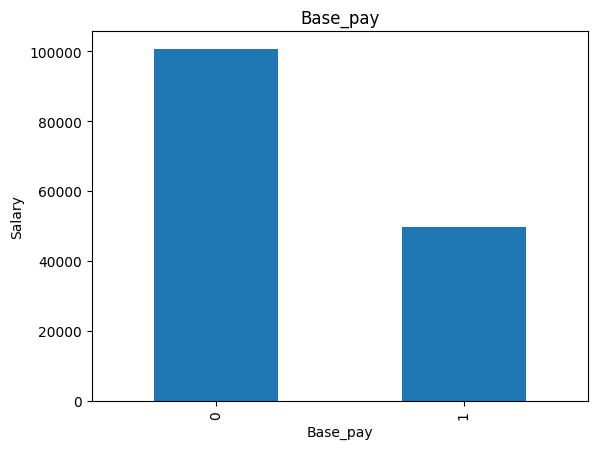

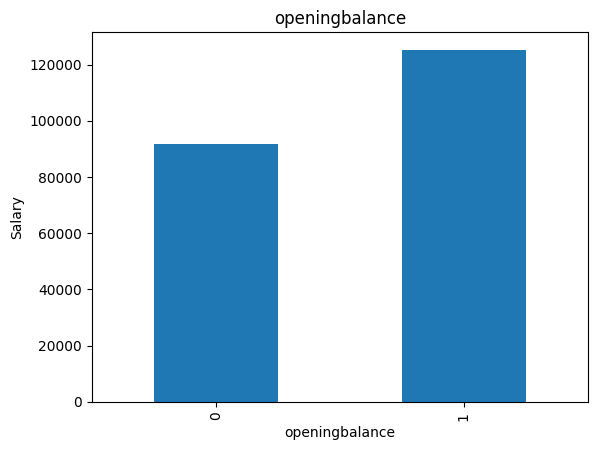

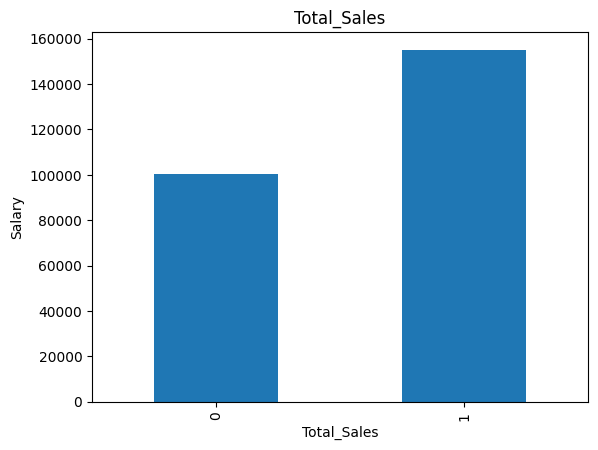

In [16]:
# Bivariate analysis to plot relation of null values with target column (salary)

for feature in features_with_na:
    df = data.copy() #copy of data set

    #Creating a variable which indicates 1 for a null value and 0 for all other values

    df[feature] = np.where(df[feature].isnull(),1,0)

    #Creating mean Sales Price where information is missing

    df.groupby(feature)['Salary'].median().plot.bar()
    plt.title(feature)
    plt.ylabel('Salary')
    plt.show()

*Here the relation between missing values and the dependant variable is clearly visible. So we need to replace these missing values with some meaningful values which we will do in the feature engineering time.*

**2.All the Numerical Variables**

In [17]:
# Creating a list of numerical values

numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print("The length of numerical variables: " ,len(numerical_features),'\n')

#display the numerical variables

data[numerical_features].head()

The length of numerical variables:  13 



,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
0,0,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0
1,0,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0
2,0,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0
3,1,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0
4,0,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1


**3.Distribution of Numerical Variables**



3.1. Discrete Variables

In [18]:
#Numerical Variables are usually of two types - Continuous and discrete

discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25]  # Simply consider values below 25 as discrete

print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [19]:
discrete_feature

['Business']

In [20]:
data['Business'].nunique() # number of unique values in discrete column 'Busness '

2

In [21]:
data['Business'].unique() # Print unique values

array([0, 1])

**BIVARIATE ANALYSIS**

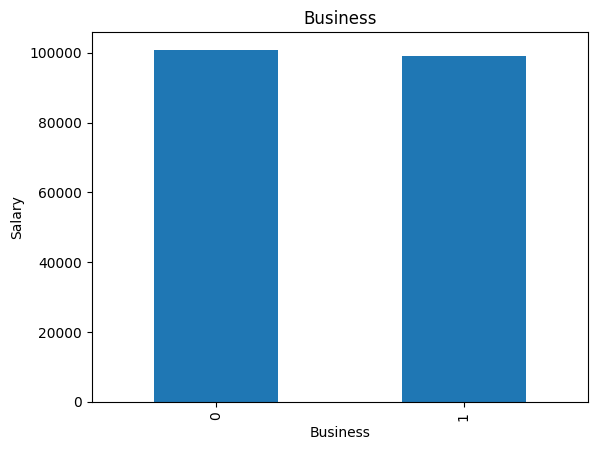

In [22]:
#Finding Relationship with Discrete features and Salary

for feature in discrete_feature:
    df = data.copy()
    df.groupby(feature)['Salary'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Salary')
    plt.title(feature)
    plt.show()

*Business doesnot make any variation in salary distribution*

3.2. Continuous Variables

In [23]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 12


**UNIVARIATE ANALYSIS**

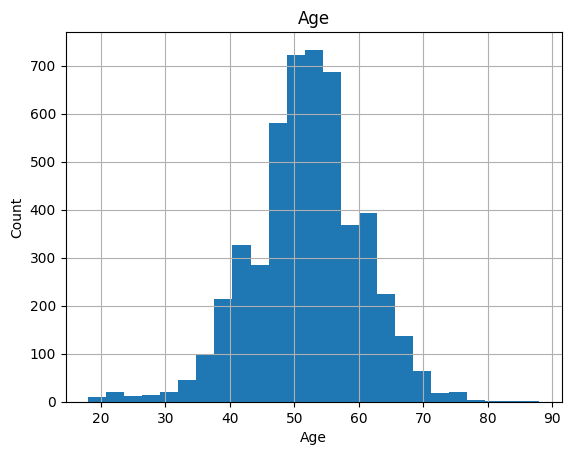

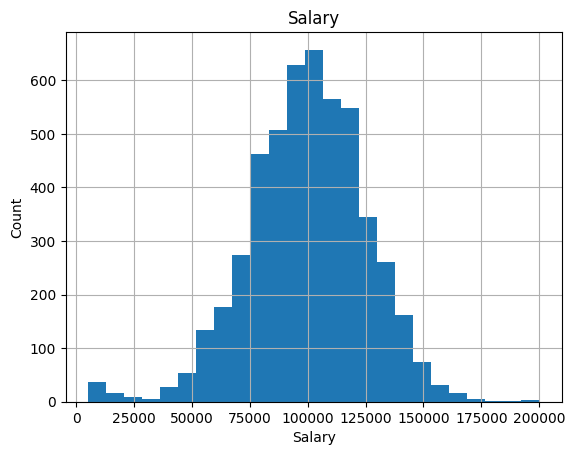

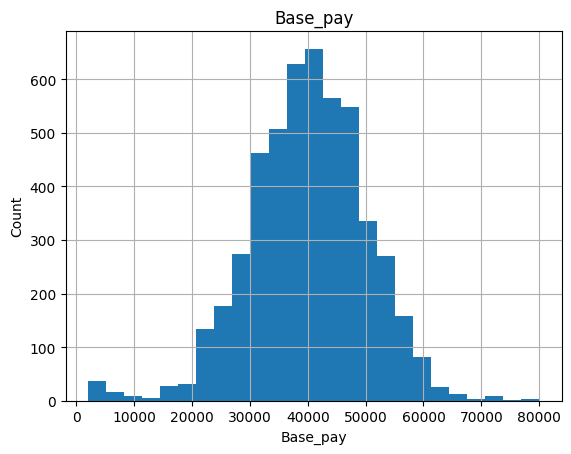

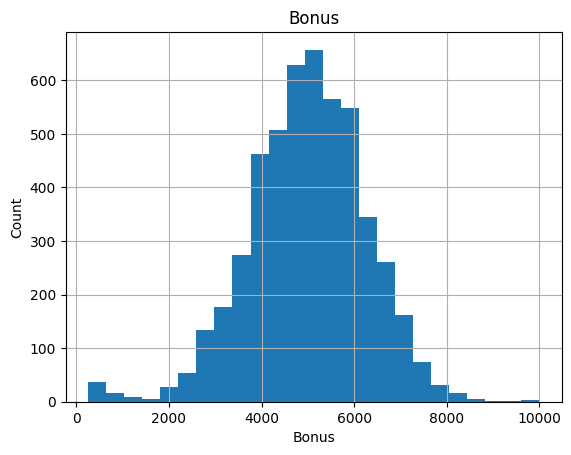

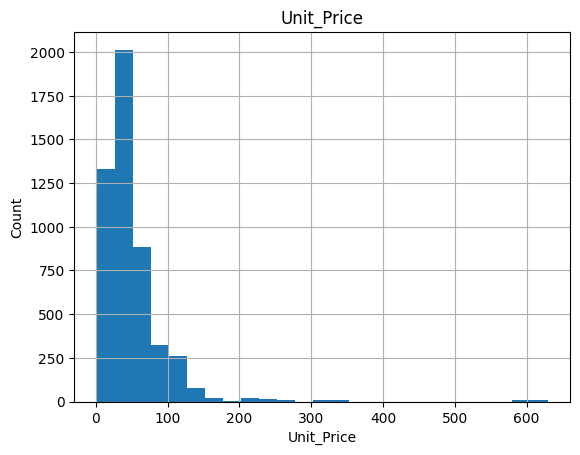

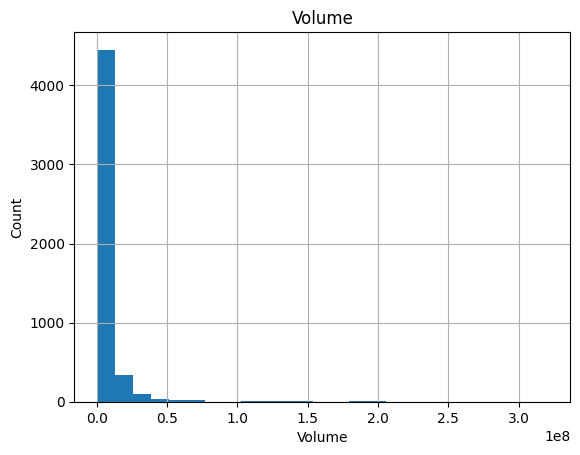

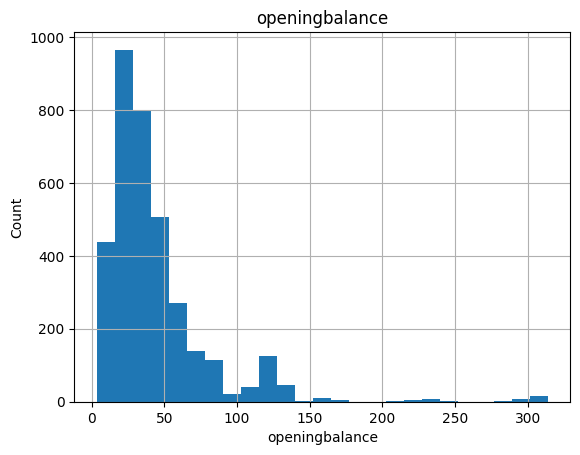

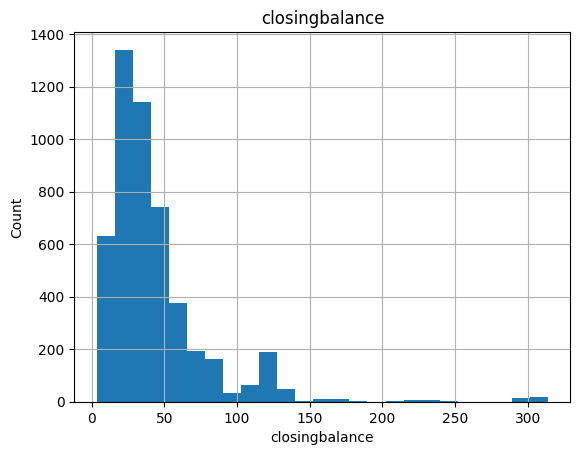

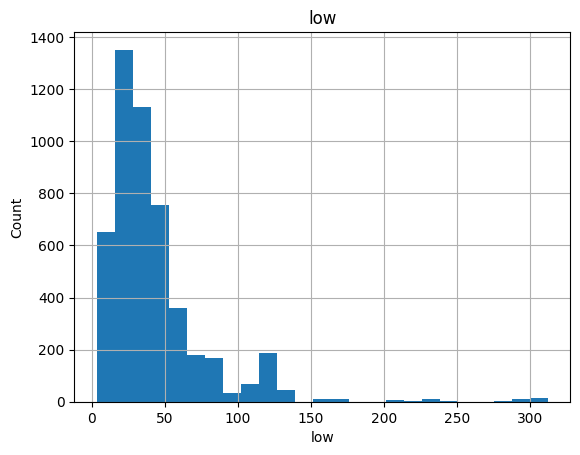

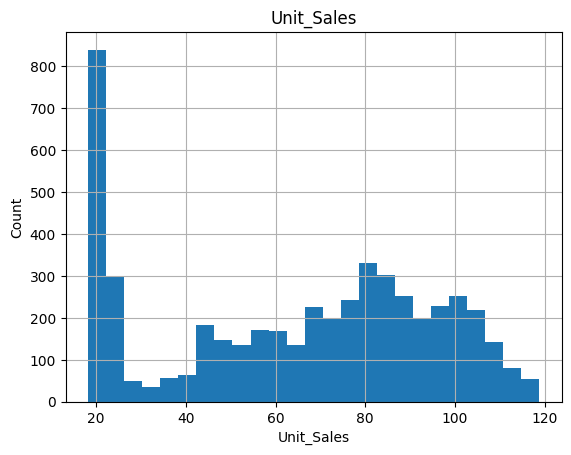

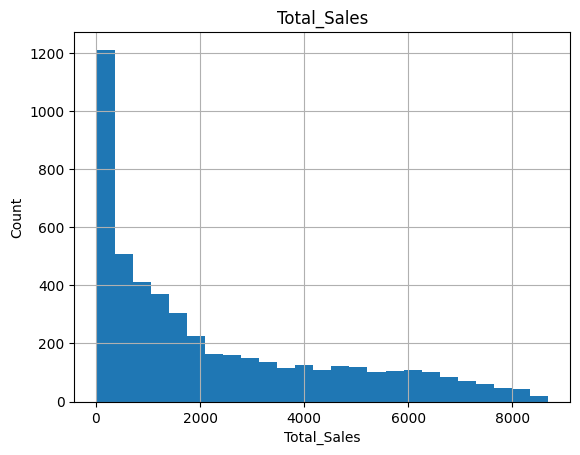

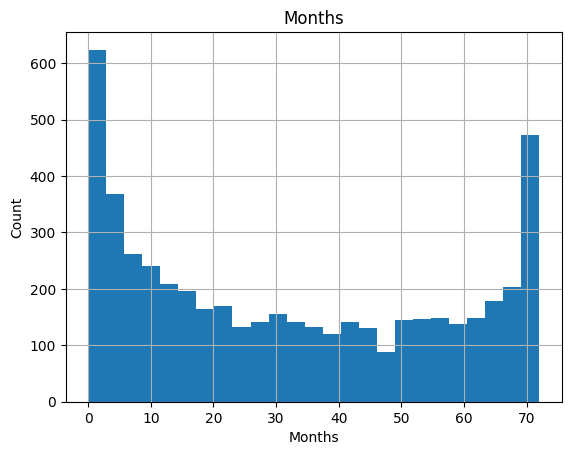

In [24]:
#Analyzing the Distribution of Continuous variables

for feature in continuous_feature:
    df = data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

*The majority of continuous features resemble a normal distribution, which means the data is symmetrically distributed around the mean, and the majority of the data points cluster near the center of the distribution. The exceptions are the variables "Months" ,"Volume" ,"Total_Sales",'Unit_Sales','low','closingbalance','openingbalance','Unit_Price' which are skewed in nature.Most of the employees work for lower range of unit price earound 150,volume of 2500000,opening and closing balance of 65,unit sales of 20 and then somewhat symmetrically range from 40 to 115,but most people shows very less total sales and number of employees gradually decreases as the sales value increases. work experience of number of employees varies assymetrically. Large number of people leave the job within 5 months and then the next range of people continue 6 years. Work duration of a minimum number distributes between 5 months to 5 years*

**BIVARIATE ANALYSIS**

<Axes: >

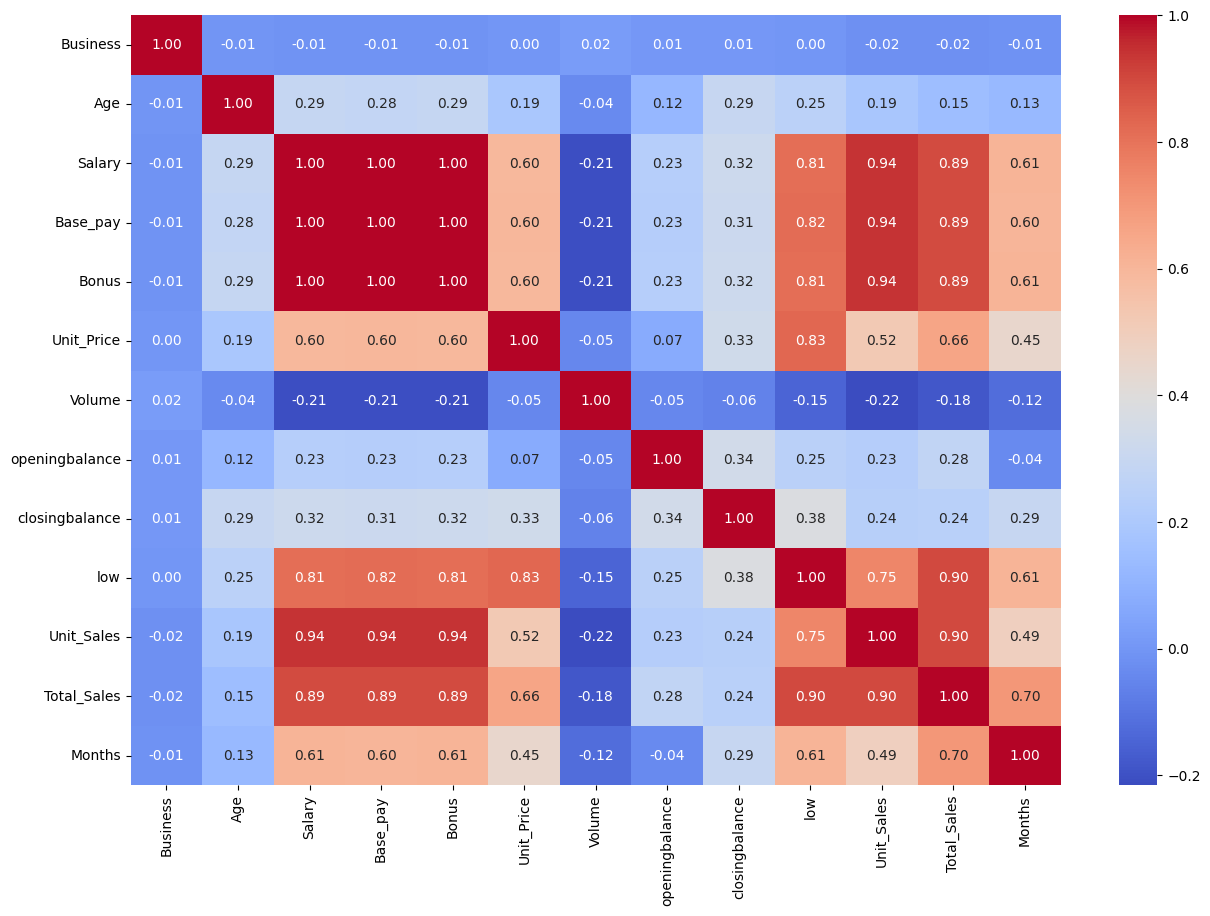

In [25]:
#Heat Map to see the correlation between the numerical features

plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_features].corr(),cmap='coolwarm',fmt='.2f',annot =True)

*Values close to 1 indicate a strong positive correlation, meaning that when one variable increases, the other tends to increase as well. For example, Salary, Base_pay, and Bonus have high positive correlations with each other (close to 1) since they represent the same aspects of compensation.*
 *Values close to -1 indicate a strong negative correlation, meaning that when one variable increases, the other tends to decrease. For example, Unit_Price and Volume have a negative correlation, suggesting that higher unit prices are associated with lower volumes.*
*Values close to 0 indicate a weak or no linear correlation between the variables. For instance, there is a weak correlation between Business and other variables, Age, Months, and low*


<Figure size 1500x10000 with 0 Axes>

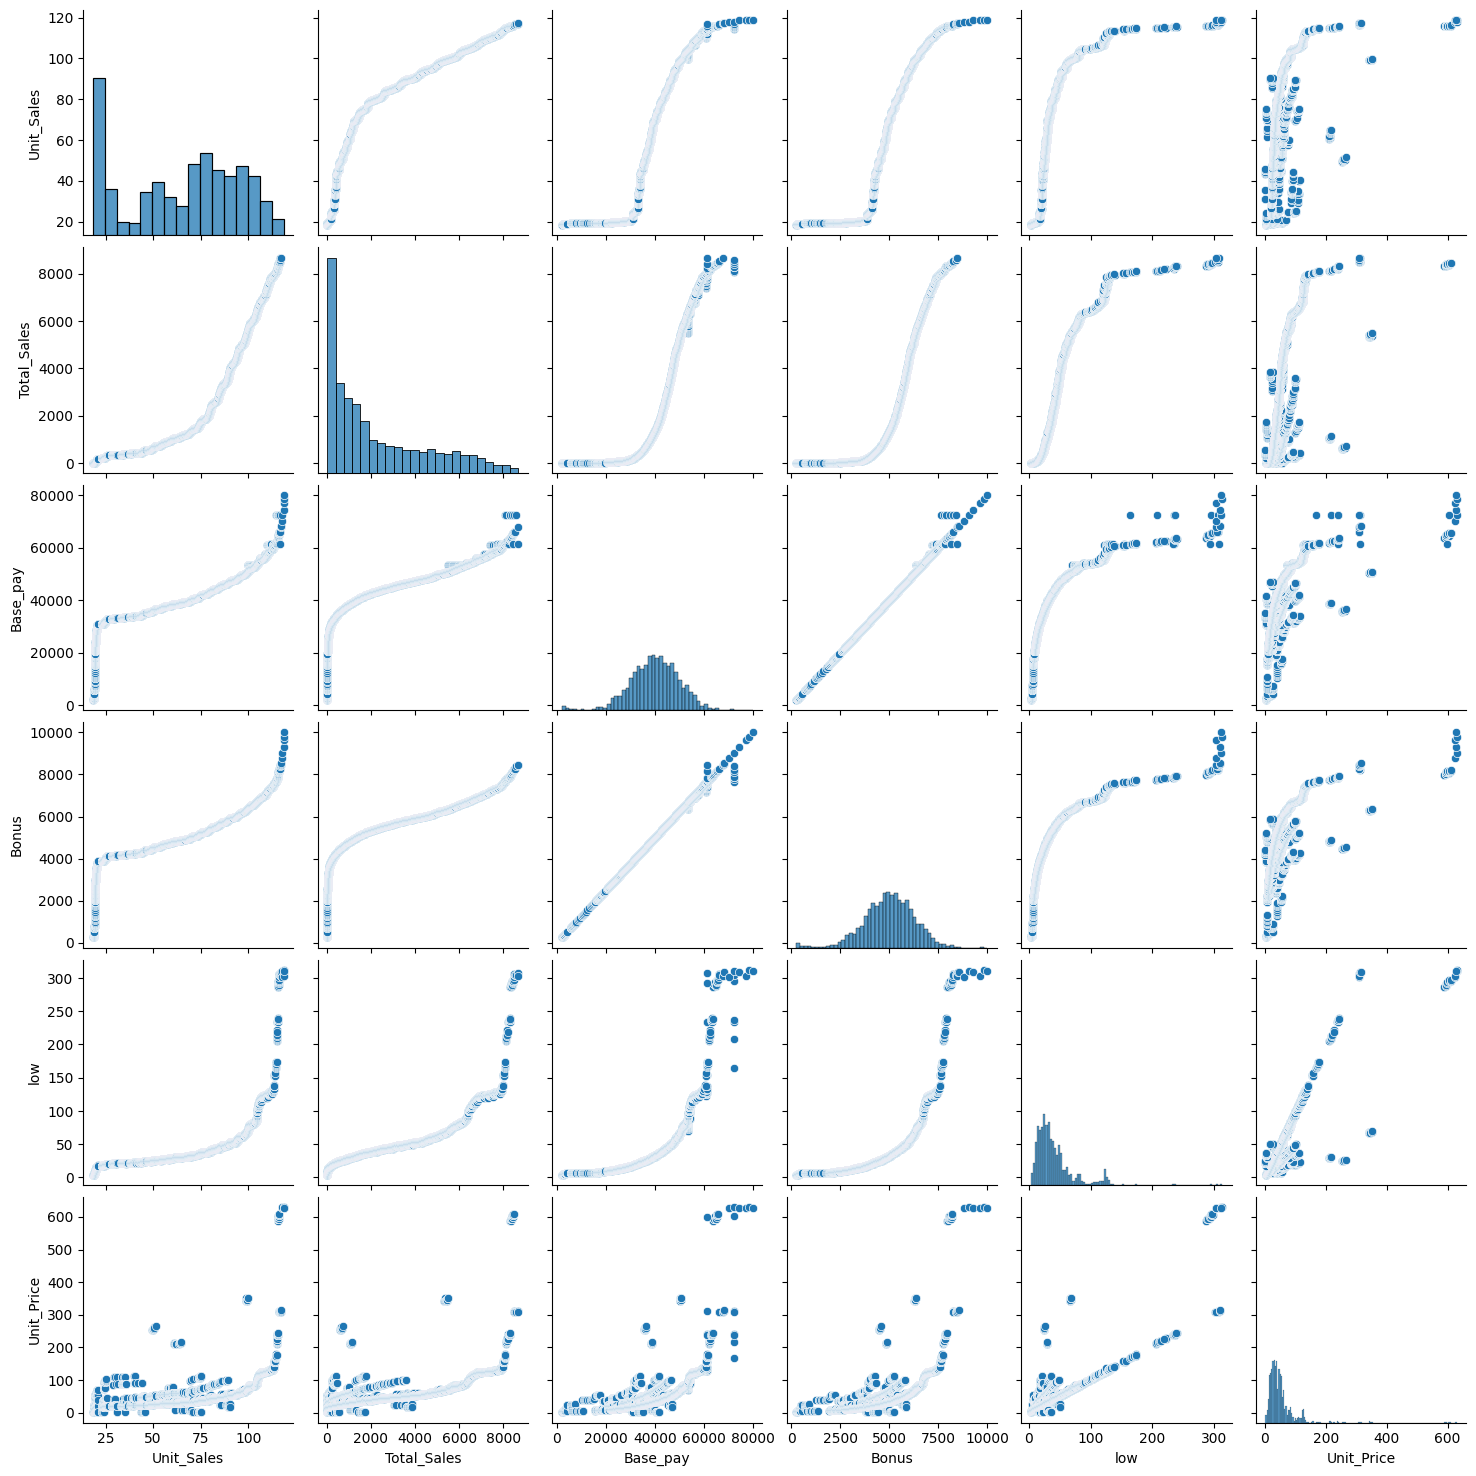

In [26]:
#Pairplot to see the relation among Unit_Sales','Total_Sales','Base_pay','Bonus','low','Unit_Price'

plt.figure(figsize=(15, 100))
sns.pairplot(data[['Unit_Sales','Total_Sales','Base_pay','Bonus','low','Unit_Price']])
plt.show()

*A linear correlation is found between the variables 'Unit_Sales', 'Total_Sales' ,'Base_pay' ,'Bonus' ,'low' and 'Unit_Price'.*

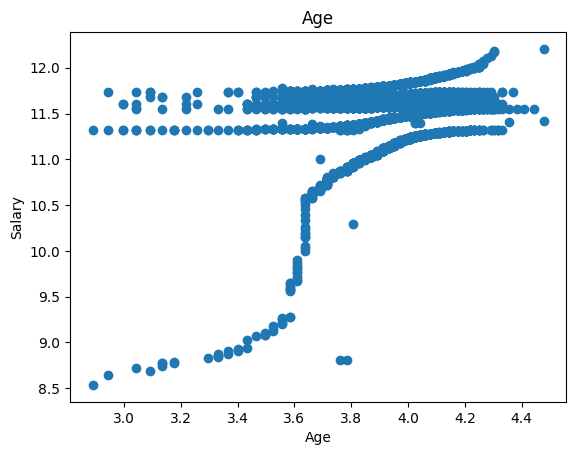

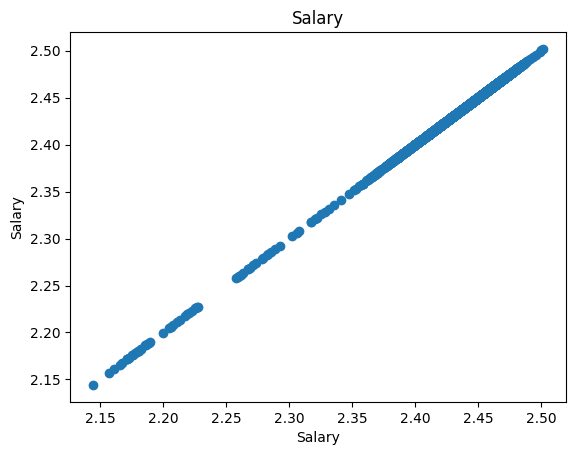

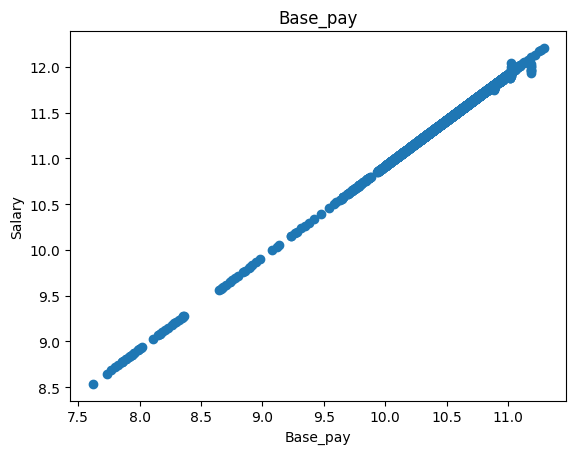

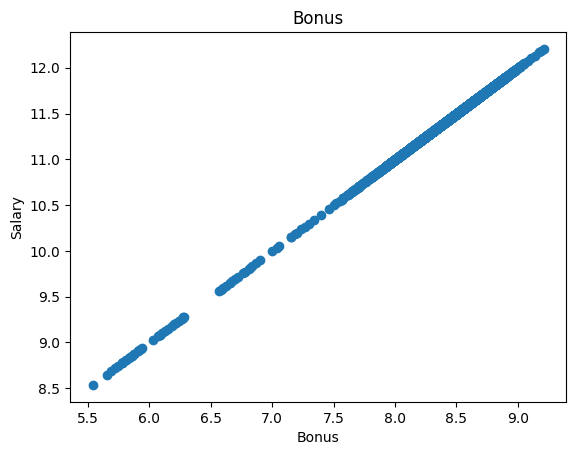

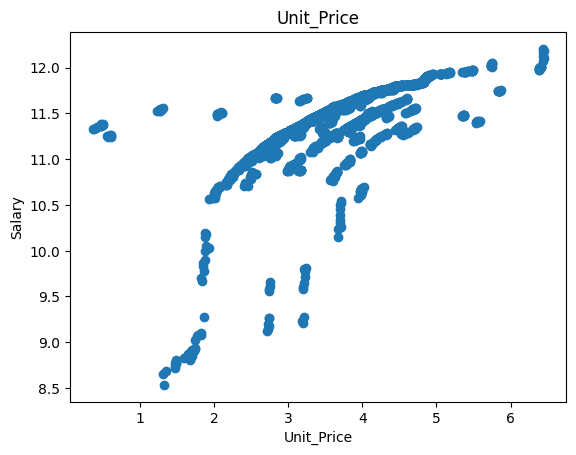

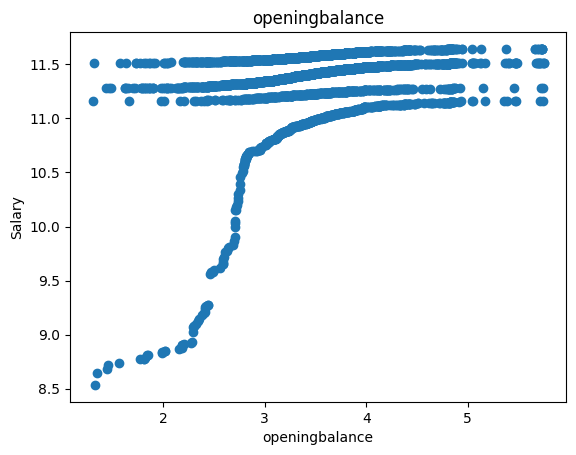

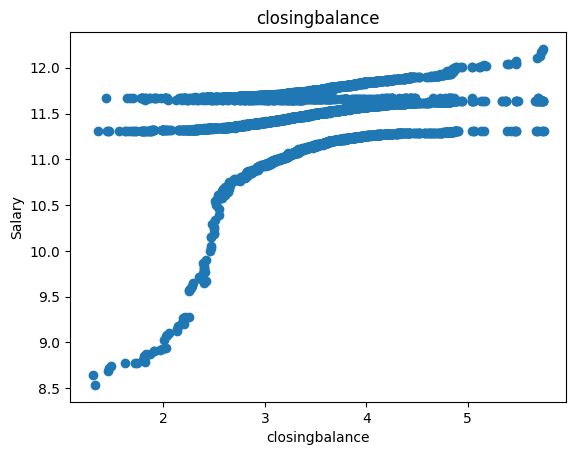

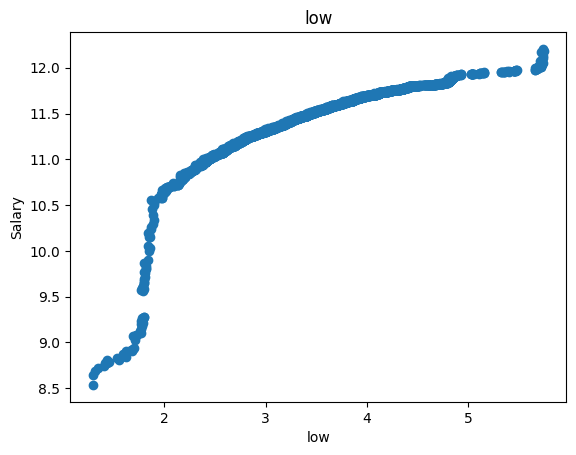

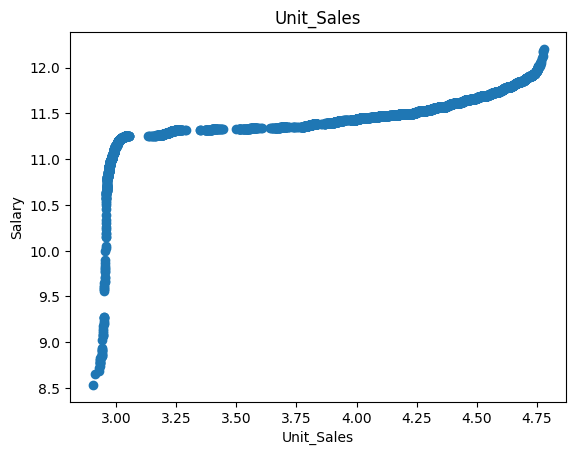

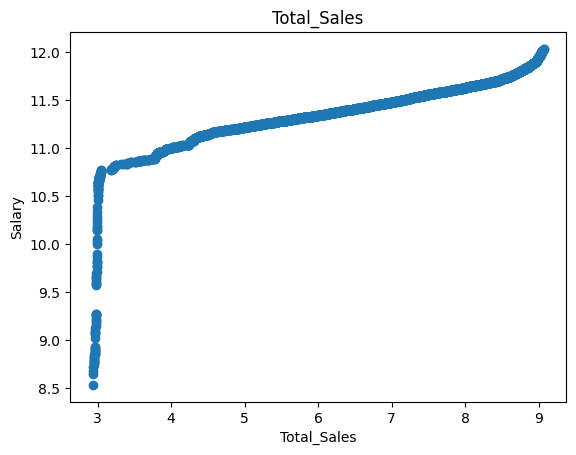

In [27]:
#To check the correlation between Countinuous features and the response variable "Salary" using Logarithmic Transformation

for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df['Salary'] = np.log(df['Salary'])
        plt.scatter(df[feature], df['Salary'])
        plt.xlabel(feature)
        plt.ylabel('Salary')
        plt.title(feature)
        plt.show()

*apply a logarithm transformation to the features and the 'Salary' column. Depending on your data and the distribution of values, applying a logarithm transformation can be helpful to visualize relationships more clearly, especially when dealing with data that has a wide range of values or a skewed distribution.["Months" ,"Volume" ,"Total_Sales",'Unit_Sales','low','closingbalance','openingbalance','Unit_Price'],        Frm previous histplot its visible that age is normally distributed around 20 to 80 and in same manner salary increasearound 40s and highest salaried at 80s.  Unit price is distributed maximum around 150.  'low','Unit_Sales',and 'Total_sales' shows somewhat linear relation.    Lowest and highest salaries shows linear relation with closing and opening balances*

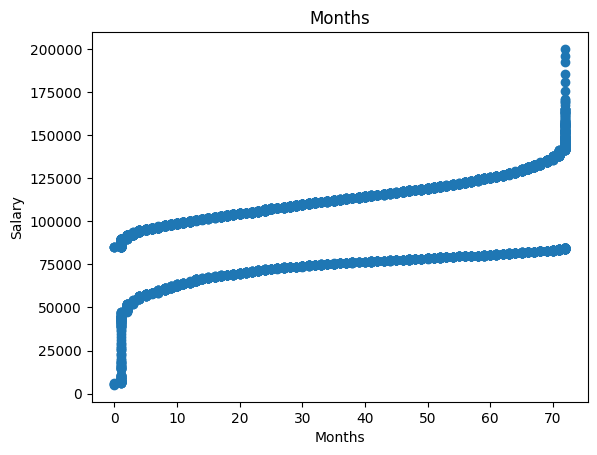

In [28]:
# month contains zeros in values and hence seperately ploted without log transform

plt.scatter(df['Months'], df['Salary'])
plt.xlabel(feature)
plt.ylabel('Salary')
plt.title(feature)
plt.show()

*The numerical features "Bonus" , "Base_pay" show a clearly linear relationship with "Salary".     There shows steep hike in salary upto 50000 and then some what stable till 1lak up to 5 years,but sudden hike for people 0f 6 years of experience.*     

**4.Outliers**

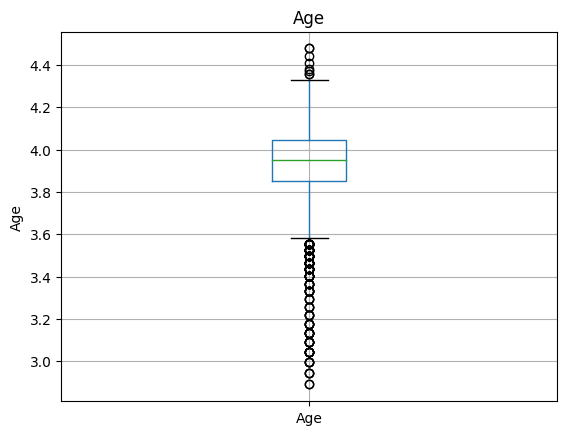

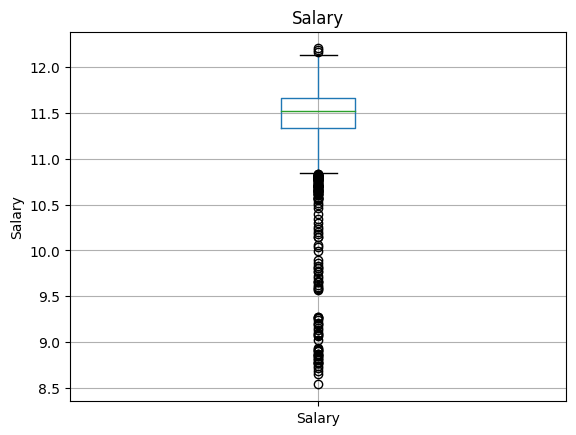

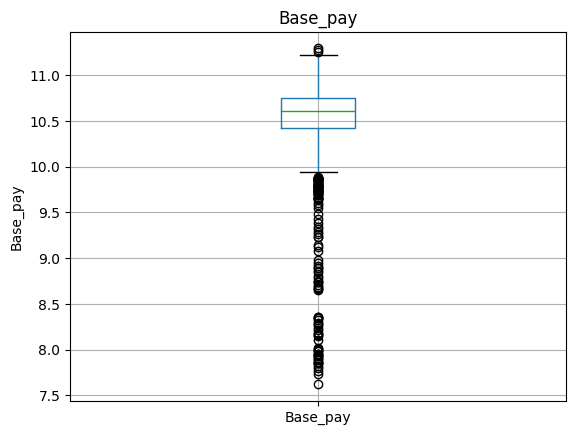

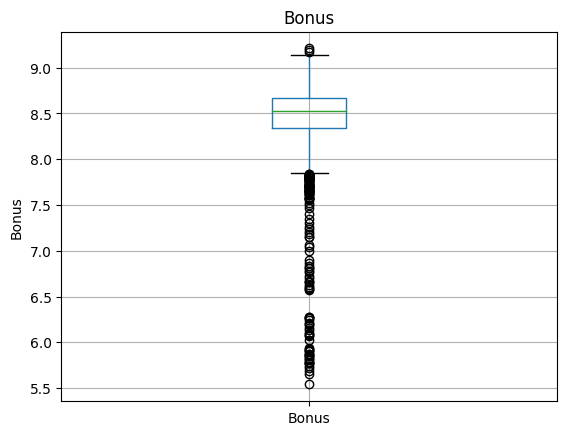

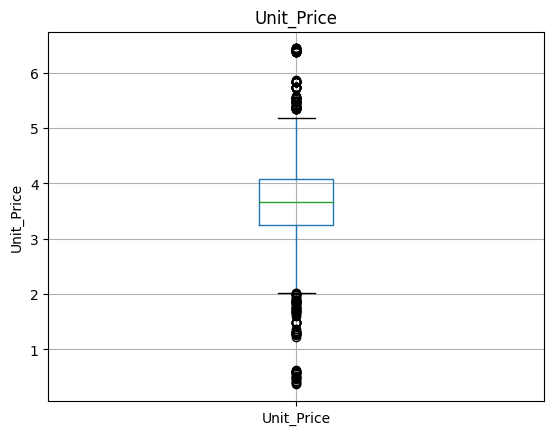

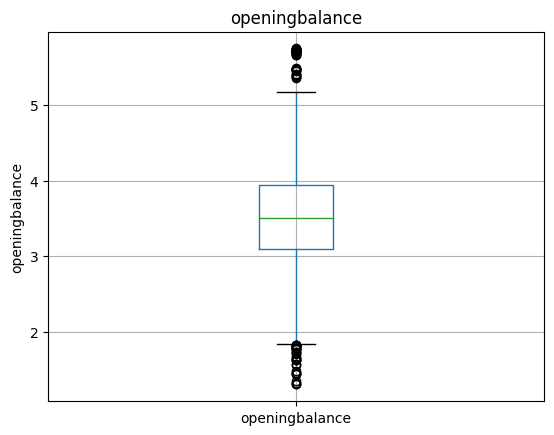

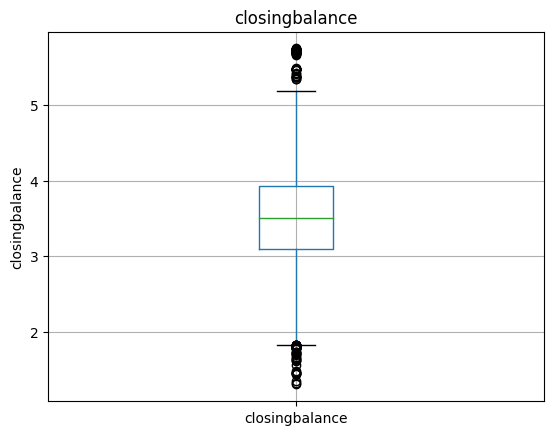

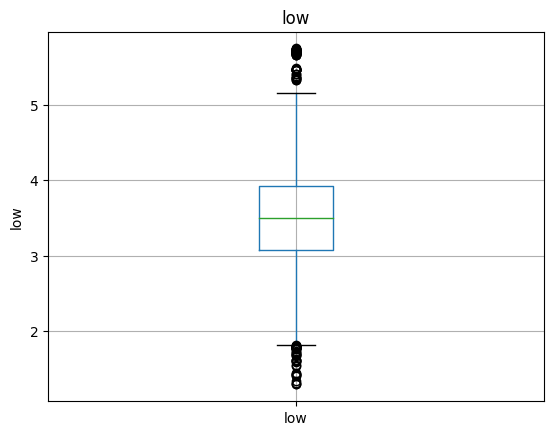

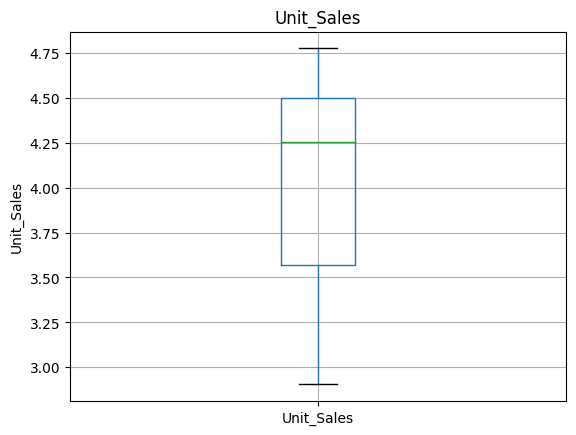

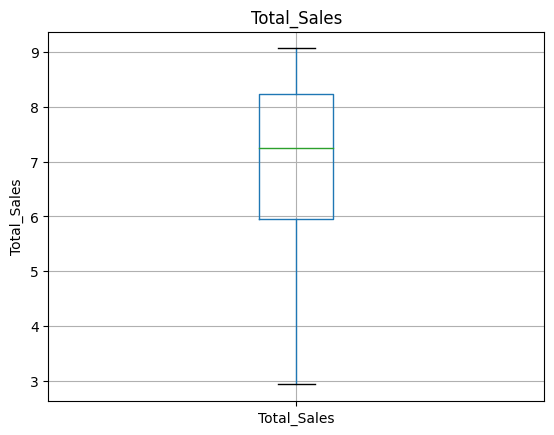

In [29]:
#Boxplot of the Continous Features

for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

*Apply a logarithm transformation to the features and the 'Salary' column. Depending on the data and the distribution of values,     A boxplot is a useful way to display the distribution of data through its quartiles and potential outliers.     By applying the logarithm transformation, you can better understand the distribution of skewed data and potential patterns or outliers.*  

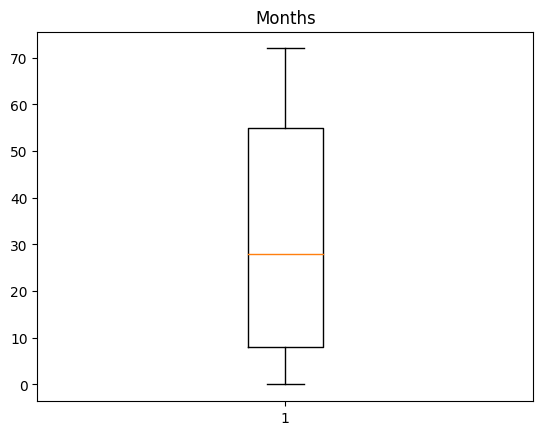

In [30]:
# month contains zeros in values and hence seperately ploted without log transform

plt.boxplot(data['Months'])
plt.title('Months')
plt.show()

*All of the variables in the boxplot clearly exhibit outliers, except for the columns "Total_Sales" ,"Unit_Sales" and 'Months'.*

In [31]:
outliers=['Age','Salary','Base_pay','Bonus','Unit_Price','openingbalance','closingbalance','low']

**5.Categorical Variables**

In [32]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['Gender', 'Dependancies', 'Calls', 'Type', 'Billing', 'Rating', 'Education']

In [33]:
print("Categorical feature Count {}".format(len(categorical_features)))

Categorical feature Count 7


In [34]:
data[categorical_features].head()

,Gender,Dependancies,Calls,Type,Billing,Rating,Education
0,Female,No,Yes,Month-to-month,No,Yes,High School or less
1,Female,No,Yes,Month-to-month,No,Yes,High School or less
2,Male,No,Yes,Month-to-month,Yes,No,High School or less
3,Female,No,Yes,Month-to-month,Yes,Yes,High School or less
4,Male,No,Yes,Month-to-month,Yes,Yes,High School or less


In [35]:
#Checking Cardinality

for feature in categorical_features:
    print("The feature is {} and number of labels are {}".format(feature,len(data[feature].unique())))

The feature is Gender and number of labels are 2
The feature is Dependancies and number of labels are 2
The feature is Calls and number of labels are 2
The feature is Type and number of labels are 3
The feature is Billing and number of labels are 2
The feature is Rating and number of labels are 2
The feature is Education and number of labels are 4


**UNIVARIATE ANALYSIS**

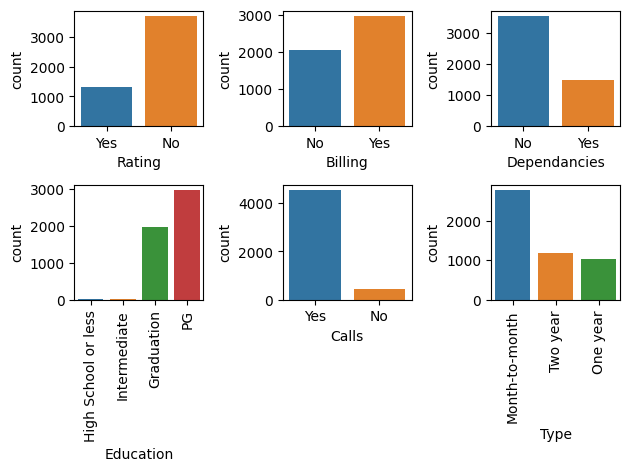

In [36]:
#to plot the count of each category in the categorical variable

plt.subplot(2, 3, 1)
sns.countplot(x ='Rating', data = data)
plt.subplot(2, 3, 2)
sns.countplot(x ='Billing', data = data)
plt.subplot(2, 3, 3)
sns.countplot(x ='Dependancies', data = data)
plt.subplot(2, 3, 4)
sns.countplot(x ='Education', data = data)
plt.xticks(rotation=90)
plt.subplot(2, 3, 5)
sns.countplot(x ='Calls', data = data)
plt.subplot(2, 3, 6)
sns.countplot(x ='Type', data = data)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

*The countplot displays some class imbalance, indicating that the frequency of data points in the various categories is significantly different from one another.*

**BIVARIATE ANALYSIS**


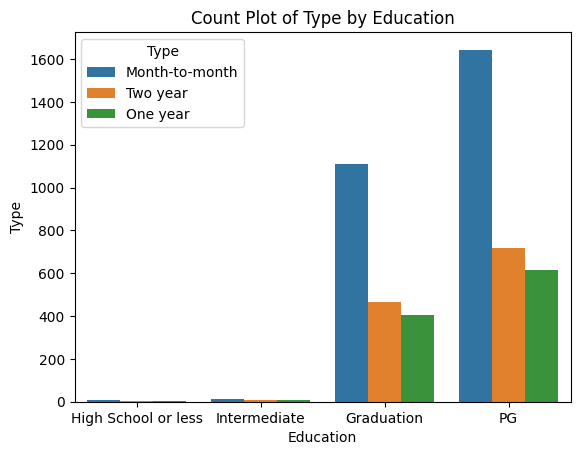

In [37]:
#Bivariate analysis of type with Education

sns.countplot(x=data['Education'],hue=data['Type'])
plt.xlabel('Education')  # Label for the x-axis
plt.ylabel('Type')  # Label for the y-axis
plt.title('Count Plot of Type by Education')  # Title for the plot
plt.show()

*In this graph which plot education by type shows more post gradute employees prefer to work in month to month contract other than yearly basis.month-to-month contracts offer greater flexibility to postgraduate employees. They can easily transition between jobs, take breaks between contracts, or pursue further studies without being tied to long-term commitments.Postgraduate employees might prefer month-to-month contracts to avoid extended trial periods before becoming regular employees.*

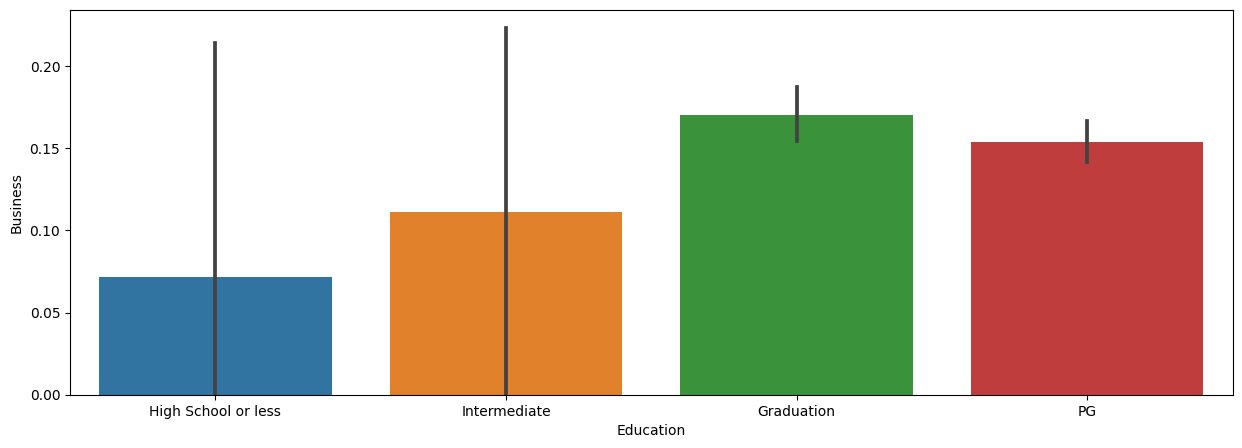

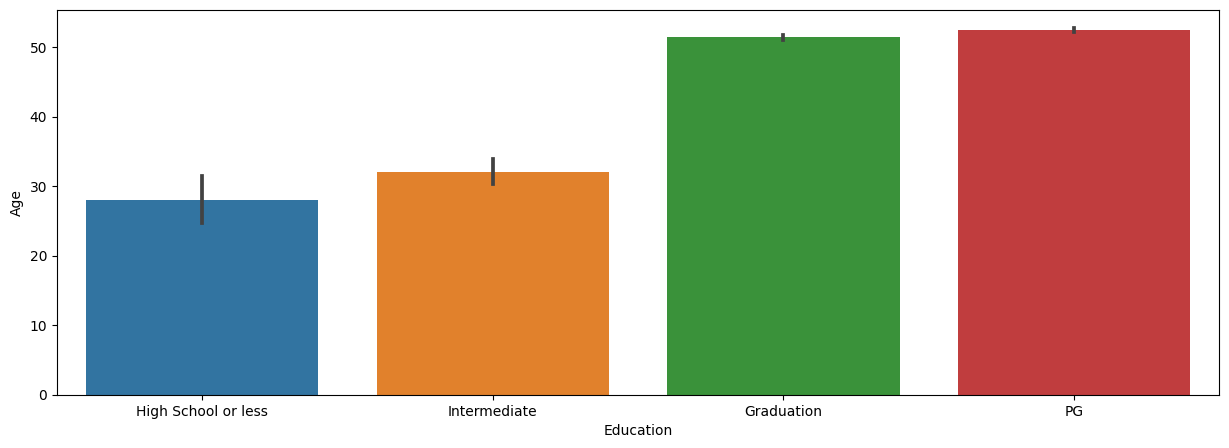

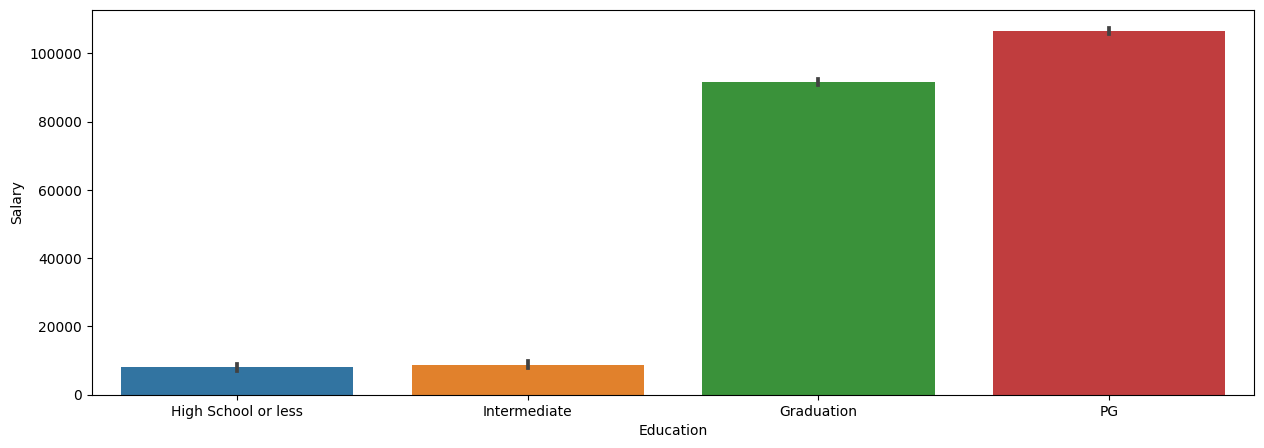

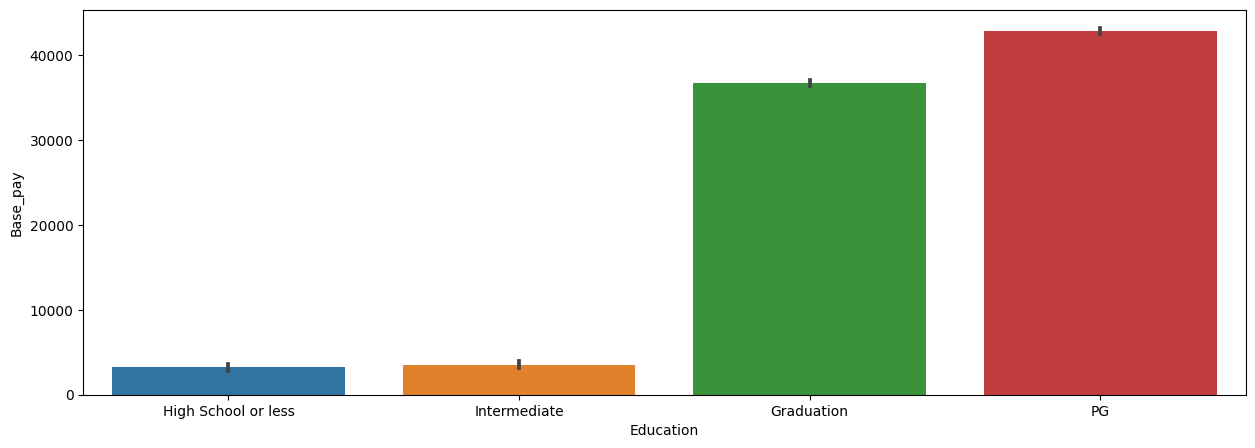

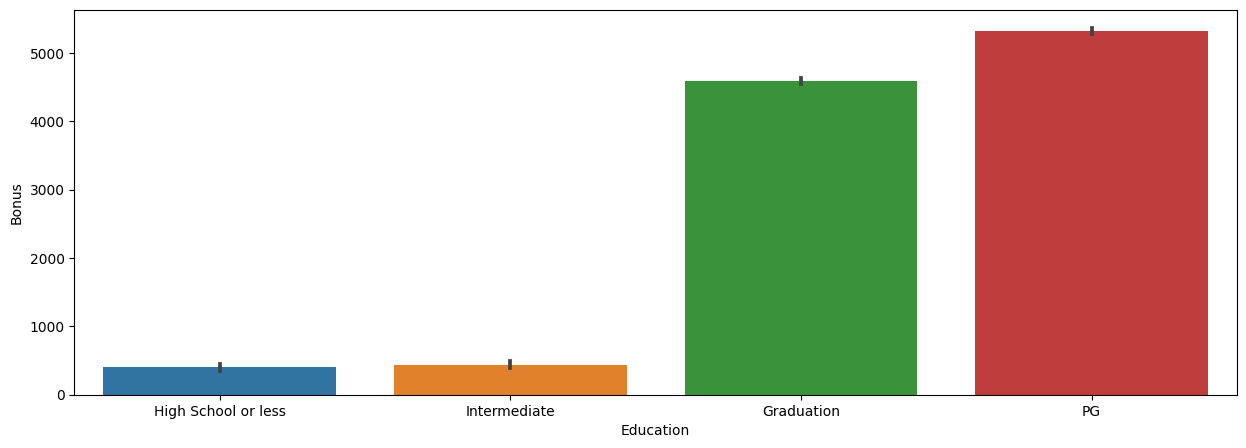

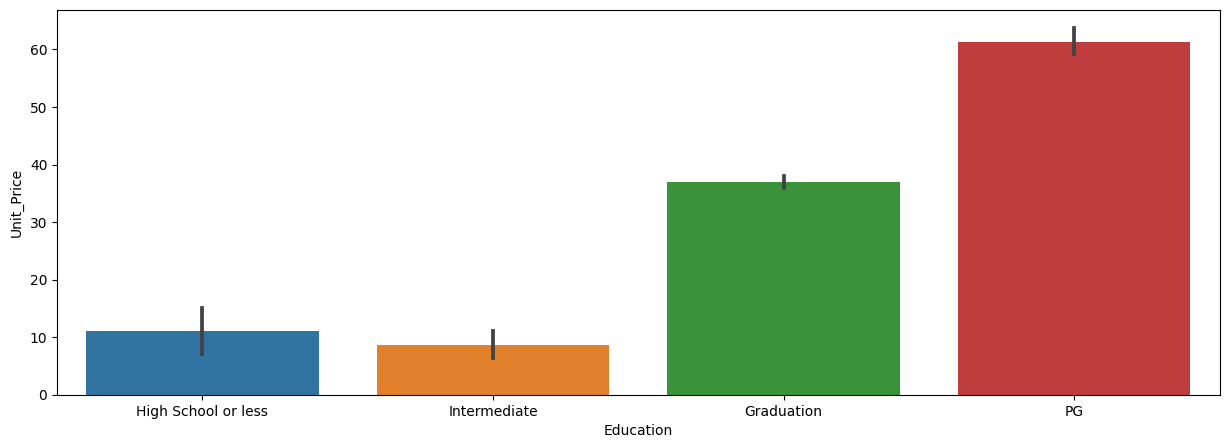

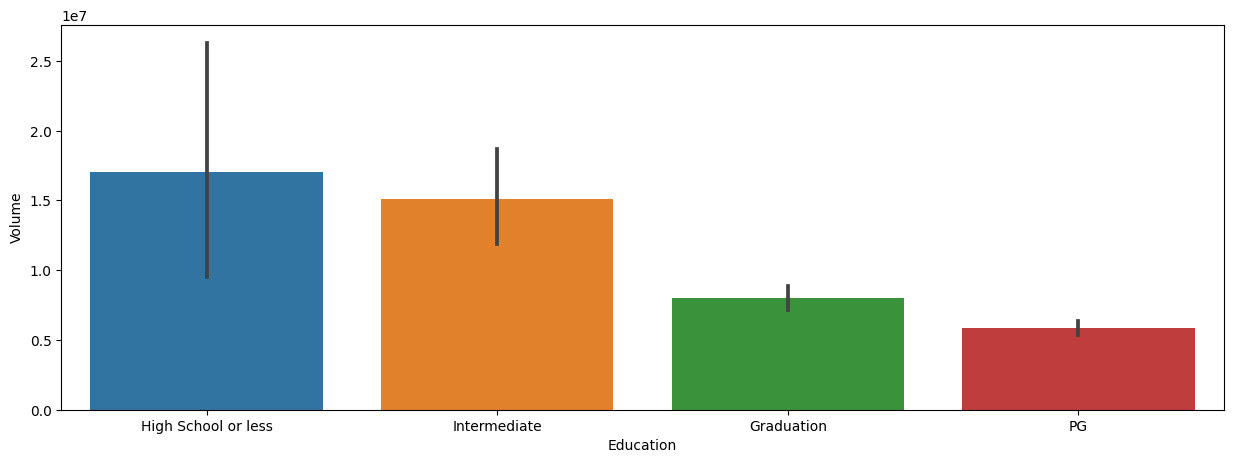

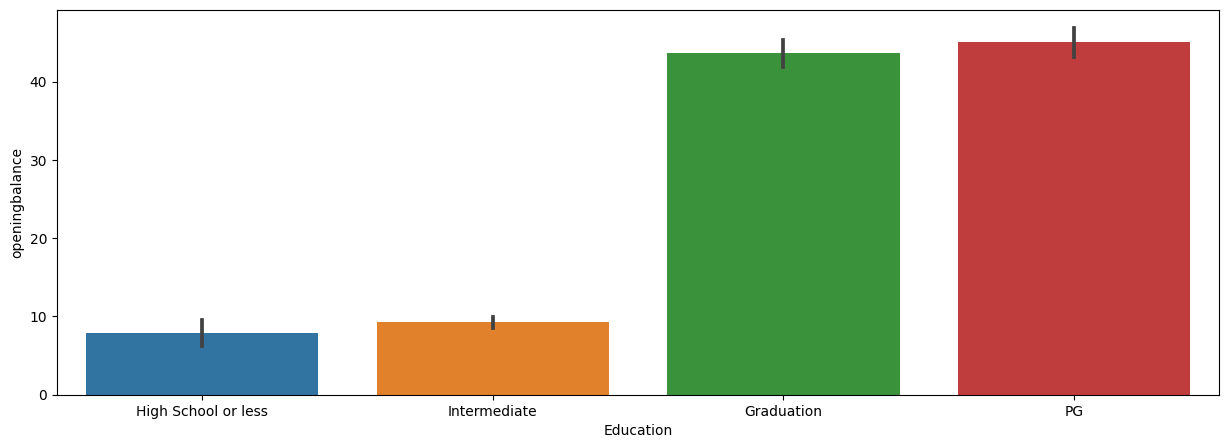

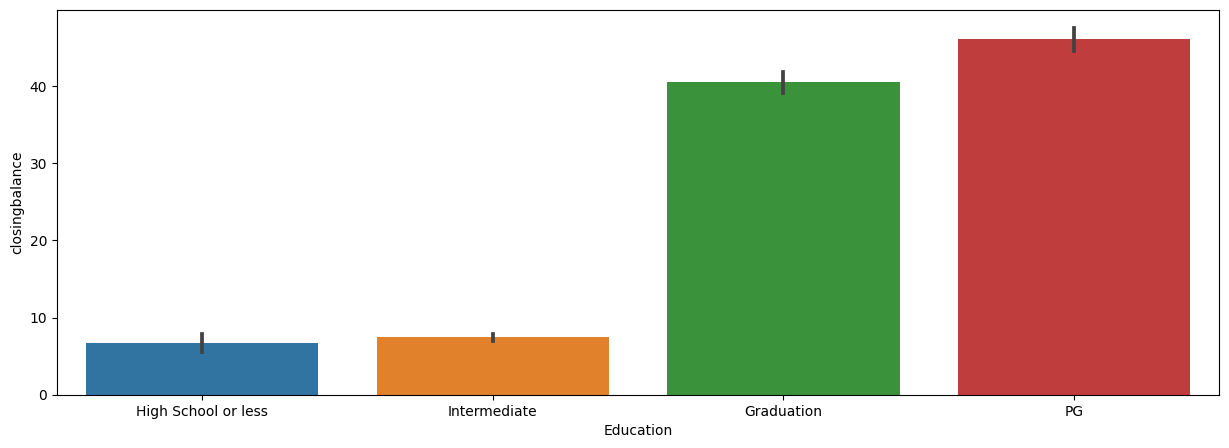

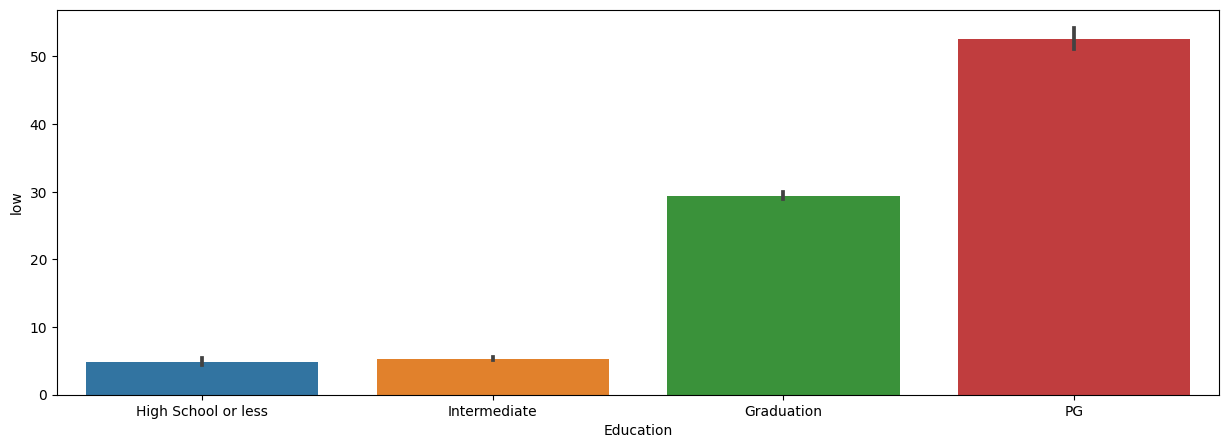

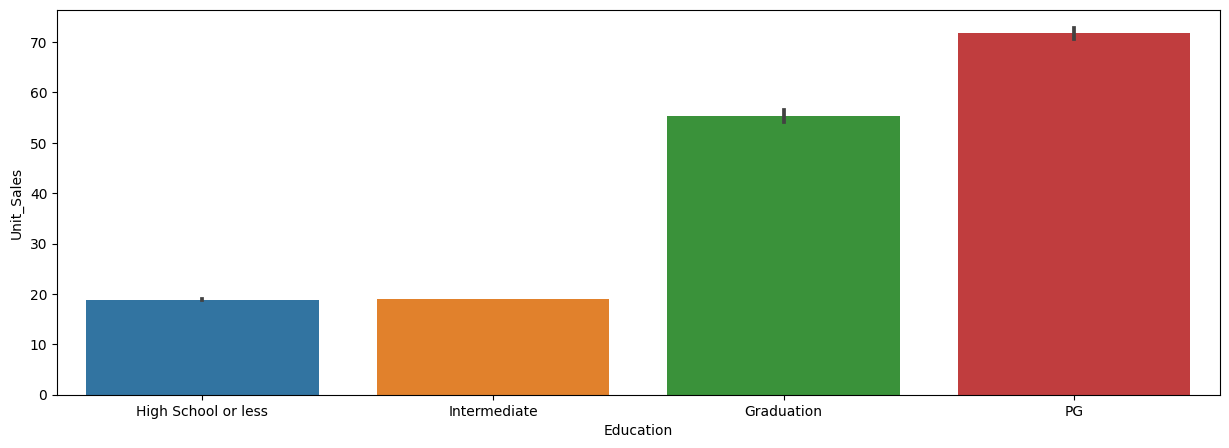

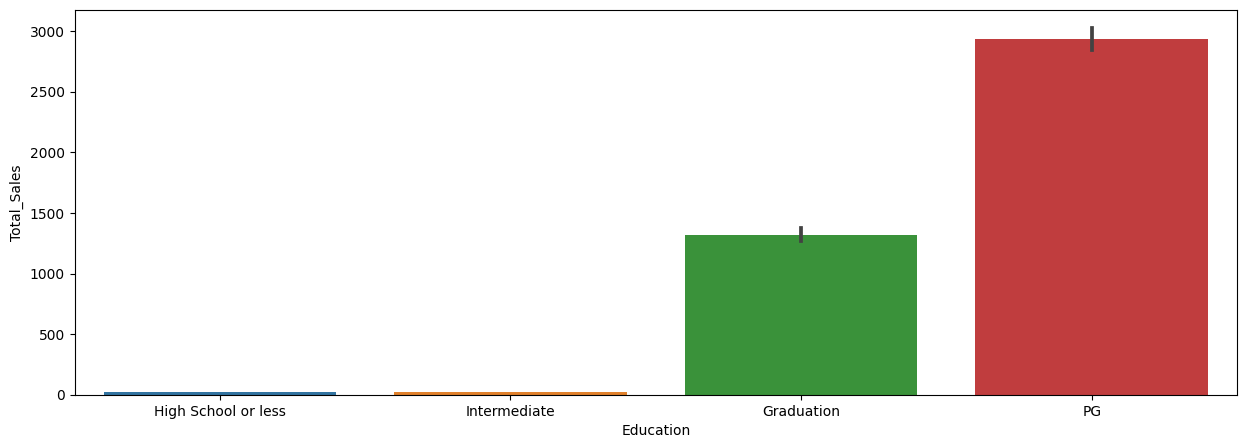

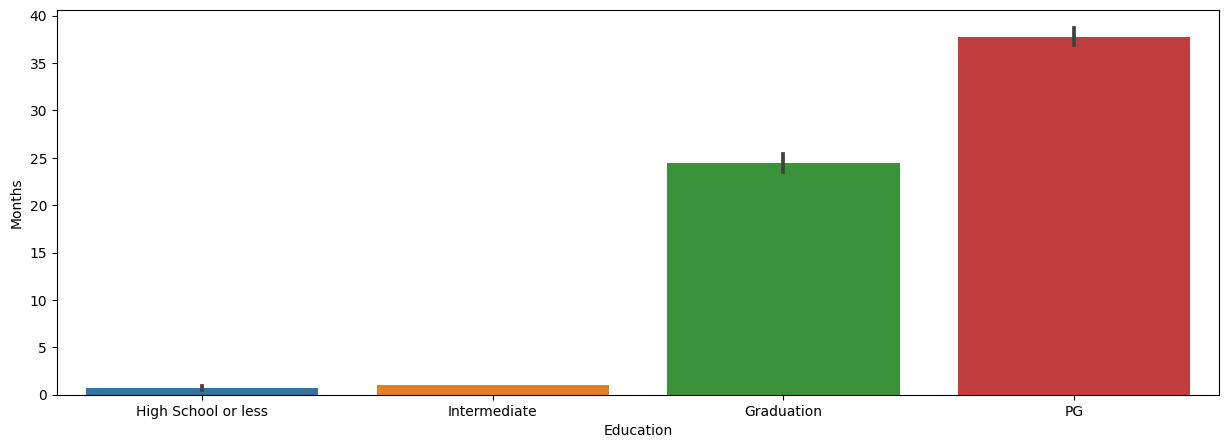

In [38]:
# Analyzing the relationship between numerical varibales and Education

for feature in numerical_features:
  plt.figure(figsize=(15,5))
  sns.barplot(x=data['Education'],y=data[feature])

*All bivariate analysis show that performance of postgraduate employees have significant importance on most of the numerical features.*

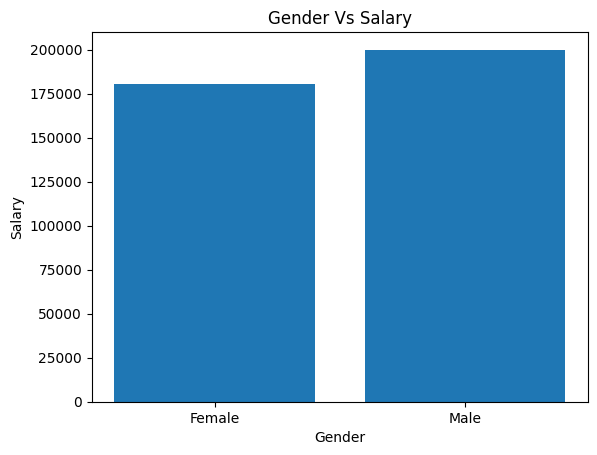

In [39]:
# Bivariate analysis of Salary and Gender

plt.bar(data['Gender'],data['Salary'])
plt.xlabel('Gender')  # Label for the x-axis
plt.ylabel('Salary')  # Label for the y-axis
plt.title('Gender Vs Salary')  # Title for the plot
plt.show()

*Compared to female employees, male employees earn higher salaries.Studies have shown that women tend to negotiate salary less frequently than men, which can lead to disparities in initial salary offers and future pay increases.Career interruptions, such as taking time off for caregiving or family responsibilities, can impact the accumulation of work experience and career progression, potentially leading to lower salaries.*

#**2. Data Preprocessing**

1. Missing Value Handling

2. Outlier Handling

3. Encoding

4. Feature Scaling

**1.Missing Value Handling**


In [40]:
#features with missing values

features_with_na

['Base_pay', 'openingbalance', 'Total_Sales']

*Base pay has normal distribution and hence as the first observation we can use mean to replace the missing values. As we proceed with mean or median filling the values does not fit with the data thrend in the set. So needsome other means of filling*

*other two shows skewed distribution from the univariate plot. Median can be used to replace missing values.*

In [41]:
# Index pointsof missing values in 'Base_Pay'

data[data['Base_pay'].isnull()].index.tolist()

[124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146]

In [42]:
col_select = [8, 9, 10]    #Specify indices of columns to select  ['Salary','Base_Pay','Bonus']
# Get multiple columns into a new data frame
data_new2 = data.iloc[110:155, col_select]   #using slicing to select rows 110 to 154 (inclusive) and columns specified by the col_select variable.
print(data_new2)

          Salary     Base_pay        Bonus
110  46970.19120  18788.07648  2348.509560
111  47243.09710  18897.23884  2362.154855
112  47608.34851  19043.33940  2380.417426
113  47621.52857  19048.61143  2381.076429
114  47647.35545  19058.94218  2382.367773
115  47695.00799  19078.00320  2384.750400
116  48071.75632  19228.70253  2403.587816
117  48081.73044  19232.69218  2404.086522
118  48161.38047  19264.55219  2408.069024
119  48385.07026  19354.02810  2419.253513
120  48390.39438  19356.15775  2419.519719
121  48452.77942  19381.11177  2422.638971
122  48811.05126  19524.42051  2440.552563
123  48892.60518  19557.04207  2444.630259
124  49076.09704          NaN  2453.804852
125  49294.09553          NaN  2464.704777
126  49346.69135          NaN  2467.334568
127  49359.76469          NaN  2467.988235
128  49372.31057          NaN  2468.615529
129  49440.90658          NaN  2472.045329
130  49492.58316          NaN  2474.629158
131  49513.92593          NaN  2475.696297
132  49522.

*All continuous 23 values are missing from index 124 to 146:*

In [43]:
x=data['Base_pay'].mean()
print('Mean of base pay : ',x)
y=data['Base_pay'].median()
print('Median of base pay : ',y)

Mean of base pay :  40046.1877067818
Median of base pay :  40282.01604


*Both values are above  40000*

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

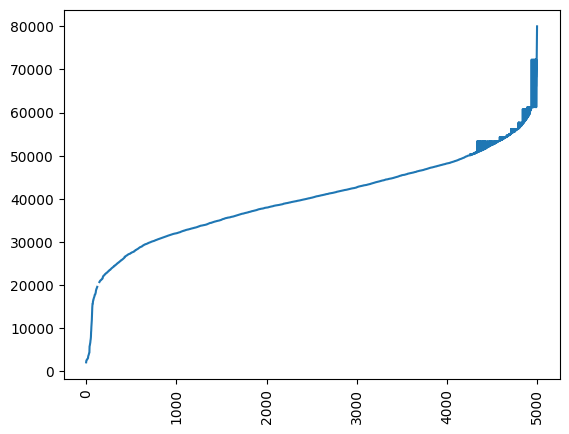

In [44]:
# Plot thedistribution of 'Base_Pay'

plotdata=pd.DataFrame(data)

plotdata['Base_pay'].plot(kind='line')
plt.xticks(rotation=90)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

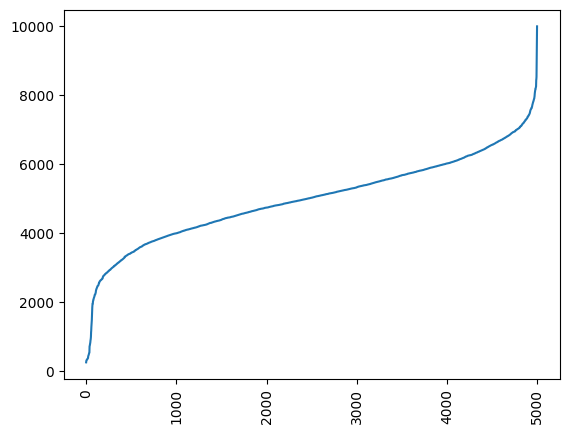

In [45]:
# Plot thedistribution of 'Bonus'

plotdata=pd.DataFrame(data)

plotdata['Bonus'].plot(kind='line')
plt.xticks(rotation=90)

*Both are showinh an increasing trend in its values*

In [46]:
# Lets explain the reason for not proceeding with mean or median fill

df=data.copy()
df['sum'] = df['Bonus'] + df['Base_pay']  # New column formed with sum of other two columns, the new column will be at the last (20th) index position

col_select = [8, 9, 10, 20]  # Specify indices of columns to select

data_new2 = df.iloc[110:155, col_select]    # Get multiple columns using index slicing
print(data_new2)

          Salary     Base_pay        Bonus           sum
110  46970.19120  18788.07648  2348.509560  21136.586040
111  47243.09710  18897.23884  2362.154855  21259.393695
112  47608.34851  19043.33940  2380.417426  21423.756826
113  47621.52857  19048.61143  2381.076429  21429.687859
114  47647.35545  19058.94218  2382.367773  21441.309953
115  47695.00799  19078.00320  2384.750400  21462.753600
116  48071.75632  19228.70253  2403.587816  21632.290346
117  48081.73044  19232.69218  2404.086522  21636.778702
118  48161.38047  19264.55219  2408.069024  21672.621214
119  48385.07026  19354.02810  2419.253513  21773.281613
120  48390.39438  19356.15775  2419.519719  21775.677469
121  48452.77942  19381.11177  2422.638971  21803.750741
122  48811.05126  19524.42051  2440.552563  21964.973073
123  48892.60518  19557.04207  2444.630259  22001.672329
124  49076.09704          NaN  2453.804852           NaN
125  49294.09553          NaN  2464.704777           NaN
126  49346.69135          NaN  

*If we replace the missing values with mean or median then the sum will be above 40000 and the final salary will be above the actual. as shown the expected sum is to be somewhere around 22 to 23000. "Due to the continuous increasing trend in the 'Base_pay' and 'Bonus' column and the strong positive correlation with 'Salary' , Forward and Backward Filling is chosen to fill the 23 missing values from row 124 to 146, instead of using the median."*

In [47]:
# Forward-fill missing values from index 124 to 135
data['Base_pay'] = data['Base_pay'].fillna(method='ffill', limit=12)

# Backward-fill missing values from index 136 to 146
data['Base_pay'] = data['Base_pay'].fillna(method='bfill', limit=11)


In [48]:
base_pay_subset_new = data.loc[120:150, 'Base_pay']
print(base_pay_subset_new)

120    19356.15775
121    19381.11177
122    19524.42051
123    19557.04207
124    19557.04207
125    19557.04207
126    19557.04207
127    19557.04207
128    19557.04207
129    19557.04207
130    19557.04207
131    19557.04207
132    19557.04207
133    19557.04207
134    19557.04207
135    19557.04207
136    20656.45750
137    20656.45750
138    20656.45750
139    20656.45750
140    20656.45750
141    20656.45750
142    20656.45750
143    20656.45750
144    20656.45750
145    20656.45750
146    20656.45750
147    20656.45750
148    20726.05181
149    20790.77847
150    20797.77355
Name: Base_pay, dtype: float64


*Based on exploratory data analysis (EDA), it is evident that the two continuous numerical features 'openingbalance'and 'Total_Sales' contain missing values,and in addition to that, they also have outliers. Therefore, to address these missing values, median is chosen as the appropriate measure for filling in these three columns, considering the presence of outliers in the data.*

In [49]:
# Median filling

for feature  in ['openingbalance','Total_Sales']:
    data[feature ]=data[feature ].fillna(data[feature ].median())

In [50]:
data.isnull().sum()

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

*Continuous numerical features with missing values are filled by median and forward filling since the mean filling can't be used as there are outliers or extreme values with these columns.*

**2.Outlier Handling**

*Outliers present in 'Age,' 'Salary,' 'Base_pay,' 'Bonus,' 'Unit_Price,' 'openingbalance,' 'closingbalance,' and 'low' columns*

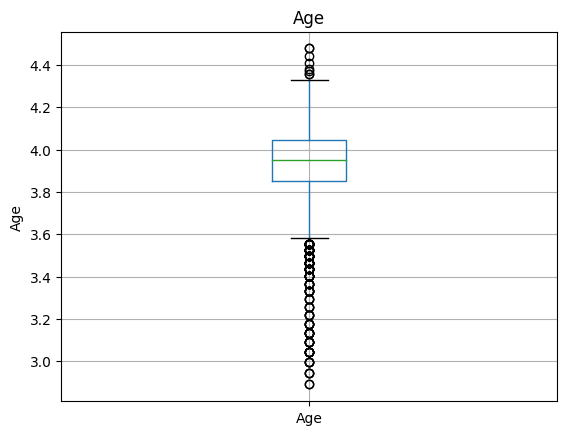

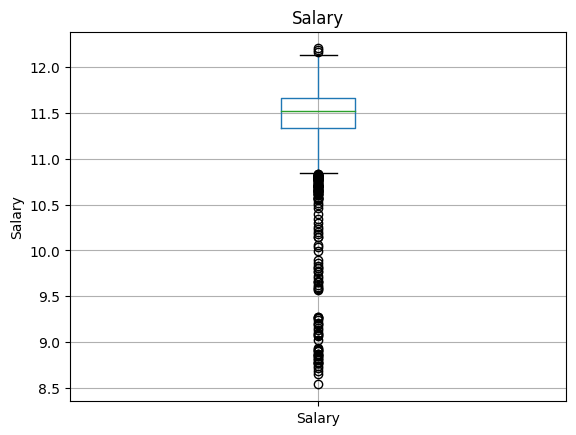

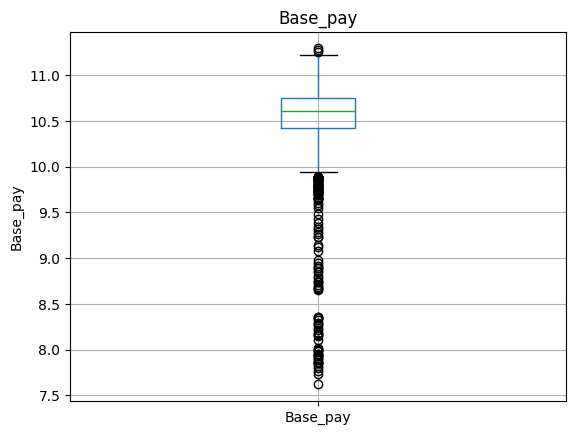

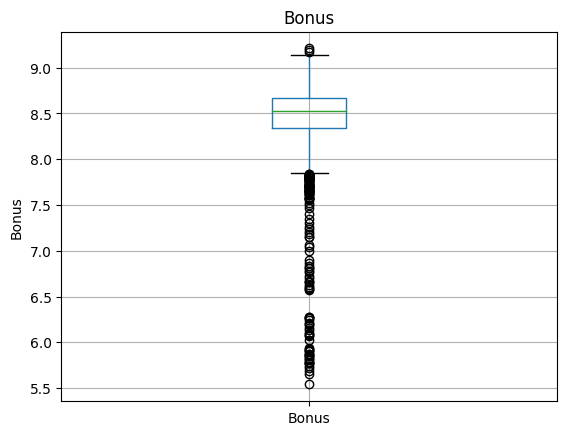

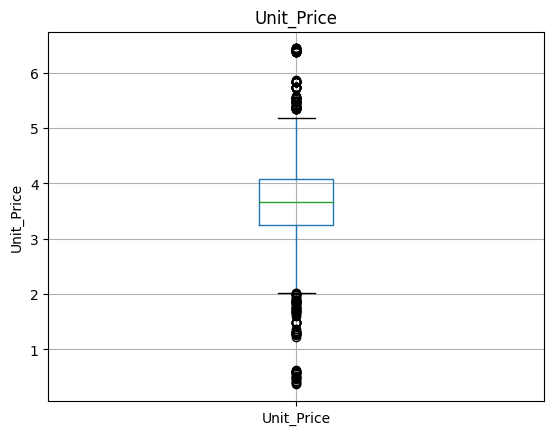

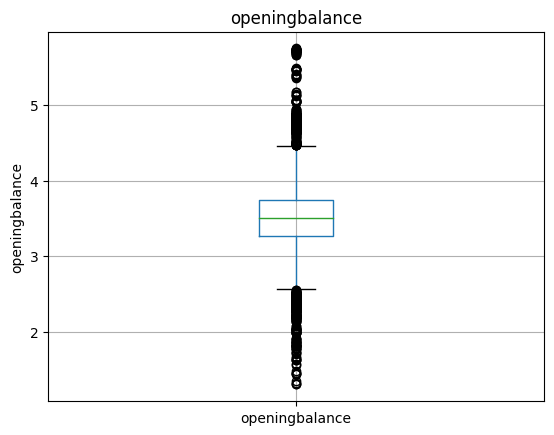

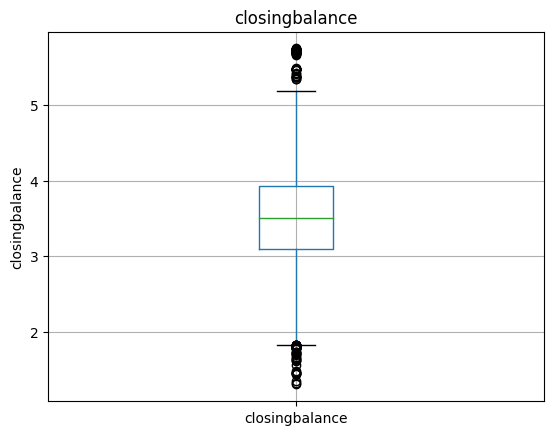

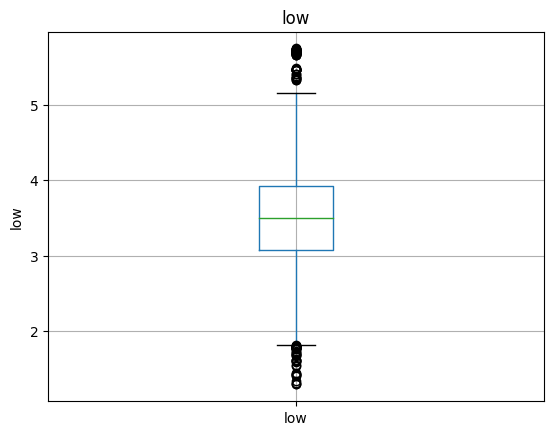

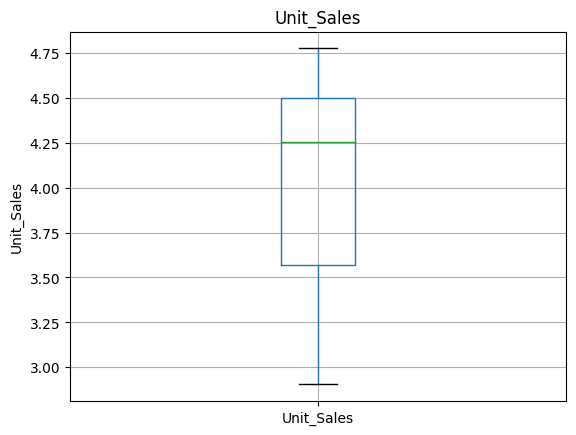

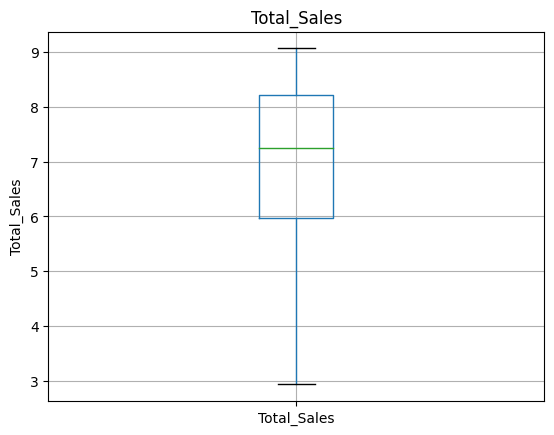

In [51]:
# Box plot using log transform for outlier detection after filling null values

for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

*Majority of outliers in the Age,BasePay, Salary, and Bonus column lies below the lower limit but all are symmetrically distributed. For other columns too shows almost similar pattern of outlier distribution above and below the limits*

*For Opening balance outliers seems increased both sides after filling null values.*

In [52]:
outliers=['Age','Salary','Base_pay','Bonus','Unit_Price','openingbalance','closingbalance','low']

 #Outliers are seen above and below the limit

for feature in outliers:
  Q1 = data[feature].quantile(0.25)
  Q2 = data[feature].quantile(0.50)
  Q3 = data[feature].quantile(0.75)
  print('\n',feature,'\n')
  print('Q1  25 % value =',Q1)
  print('Q2  50 % value =',Q2)
  print('Q3  75 % value =',Q3)
  IQR=Q3-Q1
  print('IQR=',IQR)
  up_lim=Q3+1.5*IQR
  low_lim=Q1-1.5*IQR
  print('\nUpper limit=',up_lim)
  print('Lower limit=',low_lim)



 Age 

Q1  25 % value = 47.0
Q2  50 % value = 52.0
Q3  75 % value = 57.0
IQR= 10.0

Upper limit= 72.0
Lower limit= 32.0

 Salary 

Q1  25 % value = 83890.33898
Q2  50 % value = 100579.37849999999
Q3  75 % value = 116912.092475
IQR= 33021.753495

Upper limit= 166444.7227175
Lower limit= 34357.708737500005

 Base_pay 

Q1  25 % value = 33556.1355875
Q2  50 % value = 40231.751415
Q3  75 % value = 46764.836975
IQR= 13208.701387499998

Upper limit= 66577.88905624999
Lower limit= 13743.083506250005

 Bonus 

Q1  25 % value = 4194.5169495
Q2  50 % value = 5028.968925
Q3  75 % value = 5845.6046237499995
IQR= 1651.0876742499995

Upper limit= 8322.236135124998
Lower limit= 1717.8854381250007

 Unit_Price 

Q1  25 % value = 25.72749975
Q2  50 % value = 39.205
Q3  75 % value = 58.71500025
IQR= 32.9875005

Upper limit= 108.196251
Lower limit= -23.753751

 openingbalance 

Q1  25 % value = 26.397632889999997
Q2  50 % value = 33.119999
Q3  75 % value = 42.525000250000005
IQR= 16.127367360000008

Upp

*Upper and lower limits of outlairs found using IQR method. But handling outliers at this limits may affect our model as we have people with age range 18 to 88, contract period ranging from month to 2 years, educational qualification with PG and even below high school level, work duration from even without completing a month to 6 years of experience in this organisation. So this extreme high and low ranges may lead to create outlier values in bonus, base pay, sales figures and salary too. Since these extreme range of employees are genuine and facts handling outliers at the above mentioned limits is not a better way*

In [53]:
# To check the number of unique values present in features with outliers

for feature in outliers:
    x=data[feature].nunique()
    print('\n number of unique values in ',feature,'is ',x)


 number of unique values in  Age is  65

 number of unique values in  Salary is  5000

 number of unique values in  Base_pay is  4883

 number of unique values in  Bonus is  5000

 number of unique values in  Unit_Price is  3836

 number of unique values in  openingbalance is  2986

 number of unique values in  closingbalance is  4011

 number of unique values in  low is  4014


In [54]:
# Sort and list out the values in the colums showing outliers

list_age = data["Age"].values.tolist()
list_age.sort()
print('age:',list_age)
list_Base_pay=data["Base_pay"].values.tolist()
list_Base_pay.sort()
print('base pay:',list_Base_pay)
list_Bonus=data["Bonus"].values.tolist()
list_Bonus.sort()
print('bonus:',list_Bonus)
list_salary=data["Salary"].values.tolist()
list_salary.sort()
print('salary:',list_salary)
list_Unit_Price=data["Unit_Price"].values.tolist()
list_Unit_Price.sort()
print('unit price:',list_Unit_Price)
list_openingbalance=data["openingbalance"].values.tolist()
list_openingbalance.sort()
print('opening balance:',list_openingbalance)
list_closingbalance=data["closingbalance"].values.tolist()
list_closingbalance.sort()
print('closing balance:',list_closingbalance)
list_low=data["low"].values.tolist()
list_low.sort()
print('low:',list_low)

age: [18, 18, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38

In [55]:
data['Age'].unique()

array([18, 19, 22, 21, 23, 24, 43, 44, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 45, 39, 40, 41, 42, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       73, 74, 75, 76, 20, 26, 25, 78, 88, 72, 80, 82, 85, 79])

*All these values are important with the categories of employees so the outliers are seems to be genuine at this point, and we proceed further without handlinh them. It will be better to choose a model less sensitive to outliers*


**3. Encoding**



One Hot Encoding

*One Hot Encoding (OHE) is generally preferred over Label Encoding when working with categorical variables in regression models.*

In [56]:
# As per EDA omitting ['Dependancies','Calls','Billing','Rating']
# Select the columns for encoding
df = data[['Education','Gender','Type']]

from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder with dummy variable trap
encoder = OneHotEncoder(drop='first')

# Convert the selected columns to a 2D numpy array and then perform one-hot encoding
one_hot_encoded = encoder.fit_transform(df)

Only the most relevent categorical columns are selected for encodinh as the other 4 doesnot make any significant relation with the target variable , which we have already seen in the plots represened during EDA

In [57]:
df.head()

,Education,Gender,Type
0,High School or less,Female,Month-to-month
1,High School or less,Female,Month-to-month
2,High School or less,Male,Month-to-month
3,High School or less,Female,Month-to-month
4,High School or less,Male,Month-to-month


In [58]:
# Convert the sparse matrix to a dense NumPy array
one_hot_encoded_array = one_hot_encoded.toarray()

# Get the column names for the one-hot encoded features
columns = encoder.get_feature_names_out(input_features= ['Education', 'Gender', 'Type'])

# Create a DataFrame with the one-hot encoded array and appropriate column names
df_encoded = pd.DataFrame(one_hot_encoded_array, columns=columns)

In [59]:
# Display the encoded DataFrame with selected columns of original data frame

df_encoded.head()

,Education_High School or less,Education_Intermediate,Education_PG,Gender_Male,Type_One year,Type_Two year
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0


In [60]:
# Number of columns after encoding

df_encoded.shape

(5000, 6)

*"3 relavent categorical features are one-hot encoded, resulting in 6 one-hot encoded categorical features." With dummy variable trap 3 columns reduced*

**4. Feature Scaling**

In [61]:
# Dropping categorical,discrete numerical and Target columns before scaling

x = data.drop(['Gender','Dependancies','Calls','Type','Billing','Rating','Education','Salary','Business'], axis=1)

Standard Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
scaled =pd.DataFrame(scaled,columns=x.columns)
scaled.describe()

,Age,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03
mean,-2.728484e-16,-3.183231e-16,5.456968e-16,1.136868e-16,1.136868e-17,-5.115908e-17,2.273737e-17,0.000000,0.000000,4.547474e-17,-1.818989e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100,1.000100,1.000100e+00,1.000100e+00
min,-3.956268e+00,-3.717074e+00,-3.733402e+00,-9.536690e-01,-4.172810e-01,-1.137455e+00,-1.074116e+00,-1.071474,-1.546007,-9.939799e-01,-1.306505e+00
25%,-5.683521e-01,-6.272005e-01,-6.278601e-01,-4.887368e-01,-3.380463e-01,-4.400727e-01,-5.811804e-01,-0.579900,-0.973615,-8.303990e-01,-9.817544e-01
50%,1.577133e-02,2.719230e-02,2.985092e-02,-2.307389e-01,-2.401177e-01,-2.337107e-01,-2.756194e-01,-0.276250,0.187761,-3.859381e-01,-1.698772e-01
75%,5.998947e-01,6.676132e-01,6.735193e-01,1.427383e-01,-3.173215e-02,5.500243e-02,2.029806e-01,0.200802,0.833154,6.415690e-01,9.261571e-01
max,4.221460e+00,3.924420e+00,3.946841e+00,1.106941e+01,1.938558e+01,8.385745e+00,7.271836e+00,7.329177,1.788801,2.833082e+00,1.616253e+00


Standardization
-Centers data around the mean and scales to a standard deviation of 1
-Useful when the distribution of the data is Gaussian or unknown
-Less sensitive to outliers
-Changes the shape of the original distribution
-Preserves the relationships between the data points
-Equation: (x – mean)/standard deviation

In [63]:
scaled.shape

(5000, 11)

**FEATURE REDUCTION OR SELECTION**

In [64]:
#principal component analysis

from sklearn.decomposition import PCA
pca = PCA(0.99)
s_pca = pca.fit_transform(scaled)
s_pca.shape

(5000, 8)

In [65]:
selected_columns = pca.components_
selected_columns_names = scaled.columns[np.argmax(np.abs(selected_columns), axis=1)]
selected_columns_names =np.unique(selected_columns_names)
print(selected_columns_names)

['Age' 'Base_pay' 'Months' 'Total_Sales' 'Volume' 'closingbalance'
 'openingbalance']


Principal Component Analysis shows that 7 coloumns contribute to the 99% of the variance of the data. The coloumns are 'Age', 'Base_pay', 'Months', 'Total_Sales' ,'Volume', 'closingbalance',
 'openingbalance'.

Feature Selection


In [66]:
scaled[selected_columns_names]

,Age,Base_pay,Months,Total_Sales,Volume,closingbalance,openingbalance
0,-3.956268,-3.717074,-1.306505,-0.993980,0.892749,-1.071962,-1.135306
1,-3.839443,-3.693190,-1.306505,-0.993958,0.228446,-1.074116,-1.132236
2,-3.488969,-3.685406,-1.306505,-0.993936,0.740581,-1.057694,-1.120571
3,-3.605794,-3.676447,-1.306505,-0.993892,3.664065,-1.057156,-1.119650
4,-3.372144,-3.671747,-1.265911,-0.993869,1.240929,-1.054463,-1.103380
...,...,...,...,...,...,...,...
4995,2.352265,3.168671,1.616253,-0.385938,-0.174920,6.737445,-0.233711
4996,2.469090,3.364298,1.616253,-0.385938,-0.045014,6.938616,-0.233711
4997,2.585914,3.636850,1.616253,-0.385938,0.073328,7.065920,-0.233711
4998,2.585914,3.767575,1.616253,-0.385938,-0.176068,7.134301,-0.233711


In [67]:
data1  = pd.concat([scaled[selected_columns_names],df_encoded,data['Salary']], axis=1)

scaled and encoded data combined together with target, the discrete feture Business also is not significant here which is evident from the heat map during EDA

In [68]:
data1.head()

,Age,Base_pay,Months,Total_Sales,Volume,closingbalance,openingbalance,Education_High School or less,Education_Intermediate,Education_PG,Gender_Male,Type_One year,Type_Two year,Salary
0,-3.956268,-3.717074,-1.306505,-0.993980,0.892749,-1.071962,-1.135306,1.0,0.0,0.0,0.0,0.0,0.0,5089.00
1,-3.839443,-3.693190,-1.306505,-0.993958,0.228446,-1.074116,-1.132236,1.0,0.0,0.0,0.0,0.0,0.0,5698.12
2,-3.488969,-3.685406,-1.306505,-0.993936,0.740581,-1.057694,-1.120571,1.0,0.0,0.0,1.0,0.0,0.0,5896.65
3,-3.605794,-3.676447,-1.306505,-0.993892,3.664065,-1.057156,-1.119650,1.0,0.0,0.0,0.0,0.0,0.0,6125.12
4,-3.372144,-3.671747,-1.265911,-0.993869,1.240929,-1.054463,-1.103380,1.0,0.0,0.0,1.0,0.0,0.0,6245.00


In [69]:
data1['Salary'].mean()

99821.9285527176

In [70]:
data1.describe()

,Age,Base_pay,Months,Total_Sales,Volume,closingbalance,openingbalance,Education_High School or less,Education_Intermediate,Education_PG,Gender_Male,Type_One year,Type_Two year,Salary
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,-2.728484e-16,-3.183231e-16,-1.818989e-16,4.547474e-17,1.136868e-17,2.273737e-17,-5.115908e-17,0.002800,0.005400,0.595800,0.505600,0.20560,0.239000,99821.928553
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,0.052846,0.073293,0.490786,0.500019,0.40418,0.426515,25376.961744
min,-3.956268e+00,-3.717074e+00,-1.306505e+00,-9.939799e-01,-4.172810e-01,-1.074116e+00,-1.137455e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5089.000000
25%,-5.683521e-01,-6.272005e-01,-9.817544e-01,-8.303990e-01,-3.380463e-01,-5.811804e-01,-4.400727e-01,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,83890.338980
50%,1.577133e-02,2.719230e-02,-1.698772e-01,-3.859381e-01,-2.401177e-01,-2.756194e-01,-2.337107e-01,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,100579.378500
75%,5.998947e-01,6.676132e-01,9.261571e-01,6.415690e-01,-3.173215e-02,2.029806e-01,5.500243e-02,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,116912.092475
max,4.221460e+00,3.924420e+00,1.616253e+00,2.833082e+00,1.938558e+01,7.271836e+00,8.385745e+00,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,199970.740000




**Train Test Split**

In [71]:
y = data1['Salary']
X = data1.drop(['Salary'],axis=1)

In [72]:
#split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 42)

#**Modeling**

**Linear Regression**

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr = LinearRegression()
Linear_Model = lr.fit(X_train,y_train)

In [75]:
y_pred = Linear_Model.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error,r2_score

In [77]:
print(mean_squared_error(y_test,y_pred))

1012093.3856638296


In [78]:
print(r2_score(y_test,y_pred))

0.9985383861647606


**Lasso Regression**

In [79]:
from sklearn.linear_model import Lasso

In [80]:
lasso = Lasso(alpha = 0.1)#alpha is the regularization Parametre
Lasso_Model = lasso.fit(X_train,y_train)

In [81]:
y_lasso_pred = Lasso_Model.predict(X_test)

In [82]:
print(mean_squared_error(y_test,y_lasso_pred))

1011933.2473709969


In [83]:
print(r2_score(y_test,y_lasso_pred))

0.9985386174283453


**RANSAC Regression**

(Random sample consensus (RANSAC) regression)

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RANSACRegressor

#Create a RANSACRegressor with the base estimator

base_estimator = LinearRegression()
regressor = RANSACRegressor(base_estimator=base_estimator)

**Hyper Parameter Tuning**

In [85]:

#Define hyperparameters and their potential values for tuning
param_grid = { 'min_samples': [10, 20, 50], 'residual_threshold': [5, 10, 20], 'max_trials': [50, 100, 200] }

Perform grid search with cross-validation

In [86]:
grid_search = GridSearchCV(regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RANSACRegressor(base_estimator=LinearRegression()),
             param_grid={'max_trials': [50, 100, 200],
                         'min_samples': [10, 20, 50],
                         'residual_threshold': [5, 10, 20]})

In [87]:
#to get the best hyperparameter and the model
best_params = grid_search.best_params_
best_model =grid_search.best_estimator_

In [88]:
print(best_params)

{'max_trials': 200, 'min_samples': 10, 'residual_threshold': 20}


In [89]:
print(best_model)

RANSACRegressor(base_estimator=LinearRegression(), estimator=LinearRegression(),
                max_trials=200, min_samples=10, residual_threshold=20)


In this example, X_train and y_train represent your training data and target values. The GridSearchCV function performs a grid search over the specified hyperparameters and evaluates the model's performance using cross-validation.

Remember that hyperparameter tuning can be computationally intensive, especially with a large parameter grid or a complex base estimator. It's important to balance the exploration of hyperparameters with your computational resources and time constraints.

In [90]:
reg = RANSACRegressor(base_estimator=LinearRegression(),
                        min_samples=10, max_trials=100,
                        loss='absolute_error', random_state=42,
                        residual_threshold=5)
model_reg= reg.fit(X_train,y_train)
y_pred_reg = model_reg.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print("\nMean Squared Error in RANSAC Regression is ",mean_squared_error(y_test,y_pred_reg))
print("R Squared Error in RANSAC Regression is ",r2_score(y_test,y_pred_reg))


Mean Squared Error in RANSAC Regression is  1020717.7165551609
R Squared Error in RANSAC Regression is  0.9985259313443566


Gradient Boosting

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(),
    param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Evaluation metric
    n_jobs=-1  # Number of CPU cores to use (-1 for all available cores)
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


In [93]:
best_params

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}

In [94]:
best_estimator

GradientBoostingRegressor(max_depth=4, n_estimators=300)

In [95]:
gb_regressor = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error: {mse}")
print("R Squared Error in GradientBoosting is ",r2_score(y_test,y_pred_gb))

Mean Squared Error: 75099.96714965251
R Squared Error in GradientBoosting is  0.9998916820219189


 **K - Fold Cross_Validation**

In [96]:
from sklearn.model_selection import KFold

kfold_validator =KFold(10)

# for train_index,test_index in kfold_validator.split(X,y):
#     print('Train Index:',train_index)
#     print('Test Index:',test_index)

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
cv_score = cross_val_score(gb_regressor,X,y,cv= kfold_validator)

In [99]:
np.mean(cv_score)

-0.30595294638292986

After modeling with Linear Regression, Lasso Regression ,Robust Regression and Gradient Boosting Regression models it was found that all these models except gradient boosting regression are performing with almost similar percentage of accuracy or almost similar r2 score.
Hence Gradient Boosting Regression model was chosen since it have less MSE value and higher R-squared value compared to other regression models.